In [1]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=193b9c2920d72af7a465f965f1b97bd2b207e1cea583d9e6322cff1cd5edbea2
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.models import resnet101  # Import ResNet-101 
import pickle
from cryptography.fernet import Fernet
import random
from tqdm import tqdm  # Add tqdm for live epoch updates
from imutils import paths
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
imagePaths = list(paths.list_images('/kaggle/input/autism'))

In [4]:
imagePaths

['/kaggle/input/autism/autism/validation/Autistic/45.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/20.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/30.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/38.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/42.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/33.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/10.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/35.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/41.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/03.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/37.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/46.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/44.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/01.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/50.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/29.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/16.jpg

In [5]:
# Define the transformation for the "autism" dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet-101 input size
    transforms.ToTensor()
])

In [6]:
# Load the "autism" dataset
train_dataset = ImageFolder('/kaggle/input/autism/autism/train', transform=transform)
test_dataset = ImageFolder('/kaggle/input/autism/autism/test', transform=transform)

# Print the length of the datasets
print(f"Number of samples in the training set: {len(train_dataset)}")
print(f"Number of samples in the test set: {len(test_dataset)}")

# Print the classes (categories) in the dataset
print(f"Classes in the dataset: {train_dataset.classes}")

# Print a few samples from the training set
for i in range(5):
    sample = train_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

# Print a few samples from the test set
for i in range(5):
    sample = test_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

Number of samples in the training set: 2540
Number of samples in the test set: 300
Classes in the dataset: ['Autistic', 'Non_Autistic']
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0


In [7]:
# Define the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# Initialize the global model with ResNet-101
global_model = resnet101(pretrained=True)  # Use ResNet-101 pretrained model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 300MB/s] 


In [9]:
# Adjust the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
global_model.fc = torch.nn.Linear(global_model.fc.in_features, num_classes)  # Modify the last fully connected layer
global_model = global_model.to(device)

Communication Round 1


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:07<12:53,  7.81s/it]

Training Accuracy for Client 0 - Epoch 1: 55.12%
Training Loss for Client 0 - Epoch 1: 0.7675


Client 0:   2%|▏         | 2/100 [00:09<07:19,  4.48s/it]

Training Accuracy for Client 0 - Epoch 2: 73.62%
Training Loss for Client 0 - Epoch 2: 0.5117


Client 0:   3%|▎         | 3/100 [00:12<05:31,  3.42s/it]

Training Accuracy for Client 0 - Epoch 3: 80.71%
Training Loss for Client 0 - Epoch 3: 0.4145


Client 0:   4%|▍         | 4/100 [00:14<04:40,  2.92s/it]

Training Accuracy for Client 0 - Epoch 4: 94.49%
Training Loss for Client 0 - Epoch 4: 0.2011


Client 0:   5%|▌         | 5/100 [00:16<04:11,  2.64s/it]

Training Accuracy for Client 0 - Epoch 5: 97.24%
Training Loss for Client 0 - Epoch 5: 0.1635


Client 0:   6%|▌         | 6/100 [00:18<03:52,  2.48s/it]

Training Accuracy for Client 0 - Epoch 6: 99.61%
Training Loss for Client 0 - Epoch 6: 0.0677


Client 0:   7%|▋         | 7/100 [00:20<03:40,  2.37s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0492


Client 0:   8%|▊         | 8/100 [00:22<03:31,  2.30s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0301


Client 0:   9%|▉         | 9/100 [00:25<03:25,  2.26s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0292


Client 0:  10%|█         | 10/100 [00:27<03:20,  2.22s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0309


Client 0:  11%|█         | 11/100 [00:29<03:15,  2.20s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0179


Client 0:  12%|█▏        | 12/100 [00:31<03:12,  2.19s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0133


Client 0:  13%|█▎        | 13/100 [00:33<03:09,  2.18s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0125


Client 0:  14%|█▍        | 14/100 [00:35<03:06,  2.17s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0118


Client 0:  15%|█▌        | 15/100 [00:37<03:03,  2.16s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0095


Client 0:  16%|█▌        | 16/100 [00:40<03:01,  2.16s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0136


Client 0:  17%|█▋        | 17/100 [00:42<02:59,  2.16s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0094


Client 0:  18%|█▊        | 18/100 [00:44<02:56,  2.16s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0068


Client 0:  19%|█▉        | 19/100 [00:46<02:54,  2.15s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0073


Client 0:  20%|██        | 20/100 [00:48<02:52,  2.15s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0083


Client 0:  21%|██        | 21/100 [00:50<02:50,  2.15s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0053


Client 0:  22%|██▏       | 22/100 [00:53<02:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0053


Client 0:  23%|██▎       | 23/100 [00:55<02:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0052


Client 0:  24%|██▍       | 24/100 [00:57<02:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0052


Client 0:  25%|██▌       | 25/100 [00:59<02:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0033


Client 0:  26%|██▌       | 26/100 [01:01<02:39,  2.15s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0059


Client 0:  27%|██▋       | 27/100 [01:03<02:37,  2.15s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0071


Client 0:  28%|██▊       | 28/100 [01:05<02:35,  2.15s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0037


Client 0:  29%|██▉       | 29/100 [01:08<02:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0052


Client 0:  30%|███       | 30/100 [01:10<02:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0024


Client 0:  31%|███       | 31/100 [01:12<02:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0033


Client 0:  32%|███▏      | 32/100 [01:14<02:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0024


Client 0:  33%|███▎      | 33/100 [01:16<02:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0022


Client 0:  34%|███▍      | 34/100 [01:18<02:22,  2.15s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0033


Client 0:  35%|███▌      | 35/100 [01:20<02:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0040


Client 0:  36%|███▌      | 36/100 [01:23<02:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0044


Client 0:  37%|███▋      | 37/100 [01:25<02:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0051


Client 0:  38%|███▊      | 38/100 [01:27<02:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0024


Client 0:  39%|███▉      | 39/100 [01:29<02:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0025


Client 0:  40%|████      | 40/100 [01:31<02:09,  2.15s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0026


Client 0:  41%|████      | 41/100 [01:33<02:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0016


Client 0:  42%|████▏     | 42/100 [01:36<02:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0033


Client 0:  43%|████▎     | 43/100 [01:38<02:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0025


Client 0:  44%|████▍     | 44/100 [01:40<02:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0017


Client 0:  45%|████▌     | 45/100 [01:42<01:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0040


Client 0:  46%|████▌     | 46/100 [01:44<01:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0017


Client 0:  47%|████▋     | 47/100 [01:46<01:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0038


Client 0:  48%|████▊     | 48/100 [01:48<01:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0025


Client 0:  49%|████▉     | 49/100 [01:51<01:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0022


Client 0:  50%|█████     | 50/100 [01:53<01:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0029


Client 0:  51%|█████     | 51/100 [01:55<01:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0019


Client 0:  52%|█████▏    | 52/100 [01:57<01:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0013


Client 0:  53%|█████▎    | 53/100 [01:59<01:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0013


Client 0:  54%|█████▍    | 54/100 [02:01<01:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0012


Client 0:  55%|█████▌    | 55/100 [02:04<01:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0038


Client 0:  56%|█████▌    | 56/100 [02:06<01:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0013


Client 0:  57%|█████▋    | 57/100 [02:08<01:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0030


Client 0:  58%|█████▊    | 58/100 [02:10<01:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0013


Client 0:  59%|█████▉    | 59/100 [02:12<01:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0014


Client 0:  60%|██████    | 60/100 [02:14<01:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0020


Client 0:  61%|██████    | 61/100 [02:16<01:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0015


Client 0:  62%|██████▏   | 62/100 [02:19<01:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0016


Client 0:  63%|██████▎   | 63/100 [02:21<01:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0014


Client 0:  64%|██████▍   | 64/100 [02:23<01:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0017


Client 0:  65%|██████▌   | 65/100 [02:25<01:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0034


Client 0:  66%|██████▌   | 66/100 [02:27<01:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0017


Client 0:  67%|██████▋   | 67/100 [02:29<01:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0009


Client 0:  68%|██████▊   | 68/100 [02:31<01:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0018


Client 0:  69%|██████▉   | 69/100 [02:34<01:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0007


Client 0:  70%|███████   | 70/100 [02:36<01:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0024


Client 0:  71%|███████   | 71/100 [02:38<01:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0016


Client 0:  72%|███████▏  | 72/100 [02:40<01:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0015


Client 0:  73%|███████▎  | 73/100 [02:42<00:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0070


Client 0:  74%|███████▍  | 74/100 [02:44<00:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0007


Client 0:  75%|███████▌  | 75/100 [02:47<00:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0017


Client 0:  76%|███████▌  | 76/100 [02:49<00:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0017


Client 0:  77%|███████▋  | 77/100 [02:51<00:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0041


Client 0:  78%|███████▊  | 78/100 [02:53<00:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0010


Client 0:  79%|███████▉  | 79/100 [02:55<00:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0006


Client 0:  80%|████████  | 80/100 [02:57<00:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0009


Client 0:  81%|████████  | 81/100 [02:59<00:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0014


Client 0:  82%|████████▏ | 82/100 [03:02<00:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0007


Client 0:  83%|████████▎ | 83/100 [03:04<00:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0010


Client 0:  84%|████████▍ | 84/100 [03:06<00:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0007


Client 0:  85%|████████▌ | 85/100 [03:08<00:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0007


Client 0:  86%|████████▌ | 86/100 [03:10<00:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0011


Client 0:  87%|████████▋ | 87/100 [03:12<00:27,  2.15s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0015


Client 0:  88%|████████▊ | 88/100 [03:14<00:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0012


Client 0:  89%|████████▉ | 89/100 [03:17<00:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0005


Client 0:  90%|█████████ | 90/100 [03:19<00:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0011


Client 0:  91%|█████████ | 91/100 [03:21<00:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0007


Client 0:  92%|█████████▏| 92/100 [03:23<00:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0007


Client 0:  93%|█████████▎| 93/100 [03:25<00:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0006


Client 0:  94%|█████████▍| 94/100 [03:27<00:12,  2.15s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0007


Client 0:  95%|█████████▌| 95/100 [03:30<00:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0017


Client 0:  96%|█████████▌| 96/100 [03:32<00:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0004


Client 0:  97%|█████████▋| 97/100 [03:34<00:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0004


Client 0:  98%|█████████▊| 98/100 [03:36<00:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0009


Client 0:  99%|█████████▉| 99/100 [03:38<00:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0007


Client 0: 100%|██████████| 100/100 [03:40<00:00,  2.21s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0007


Testing Accuracy for Client 0: 82.67%
Testing Loss for Client 0: 0.5167
Precision for Client 0: 0.8269
Recall for Client 0: 0.8267
F1 Score for Client 0: 0.8266


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:02<03:34,  2.17s/it]

Training Accuracy for Client 1 - Epoch 1: 52.36%
Training Loss for Client 1 - Epoch 1: 0.7830


Client 1:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 1 - Epoch 2: 79.13%
Training Loss for Client 1 - Epoch 2: 0.4938


Client 1:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 3: 77.56%
Training Loss for Client 1 - Epoch 3: 0.4480


Client 1:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 4: 93.70%
Training Loss for Client 1 - Epoch 4: 0.2138


Client 1:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 5: 99.61%
Training Loss for Client 1 - Epoch 5: 0.1057


Client 1:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0717


Client 1:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0462


Client 1:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 8: 99.61%
Training Loss for Client 1 - Epoch 8: 0.0481


Client 1:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0305


Client 1:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0274


Client 1:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0384


Client 1:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0265


Client 1:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0108


Client 1:  14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0176


Client 1:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0085


Client 1:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0121


Client 1:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0078


Client 1:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0055


Client 1:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0108


Client 1:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0092


Client 1:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0053


Client 1:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0040


Client 1:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0058


Client 1:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0101


Client 1:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0043


Client 1:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0037


Client 1:  27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0031


Client 1:  28%|██▊       | 28/100 [01:00<02:35,  2.15s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0033


Client 1:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0048


Client 1:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0028


Client 1:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0044


Client 1:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0042


Client 1:  33%|███▎      | 33/100 [01:11<02:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0031


Client 1:  34%|███▍      | 34/100 [01:13<02:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0047


Client 1:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0034


Client 1:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0078


Client 1:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0039


Client 1:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0019


Client 1:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0022


Client 1:  40%|████      | 40/100 [01:26<02:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0025


Client 1:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0018


Client 1:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0018


Client 1:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0017


Client 1:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0017


Client 1:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0015


Client 1:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0018


Client 1:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0026


Client 1:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0030


Client 1:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0013


Client 1:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0016


Client 1:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0062


Client 1:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0018


Client 1:  53%|█████▎    | 53/100 [01:54<01:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0020


Client 1:  54%|█████▍    | 54/100 [01:56<01:39,  2.15s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0009


Client 1:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0033


Client 1:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0030


Client 1:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0010


Client 1:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0015


Client 1:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0013


Client 1:  60%|██████    | 60/100 [02:09<01:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0014


Client 1:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0012


Client 1:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0017


Client 1:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0017


Client 1:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0020


Client 1:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0011


Client 1:  66%|██████▌   | 66/100 [02:22<01:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0009


Client 1:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0010


Client 1:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0023


Client 1:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0015


Client 1:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0011


Client 1:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0009


Client 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0007


Client 1:  73%|███████▎  | 73/100 [02:37<00:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0023


Client 1:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0012


Client 1:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0006


Client 1:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0015


Client 1:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0018


Client 1:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0006


Client 1:  79%|███████▉  | 79/100 [02:50<00:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0015


Client 1:  80%|████████  | 80/100 [02:52<00:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0007


Client 1:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0006


Client 1:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0008


Client 1:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0019


Client 1:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0007


Client 1:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0011


Client 1:  86%|████████▌ | 86/100 [03:05<00:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0012


Client 1:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0006


Client 1:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0007


Client 1:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0006


Client 1:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0015


Client 1:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0037


Client 1:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0006


Client 1:  93%|█████████▎| 93/100 [03:20<00:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0007


Client 1:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0009


Client 1:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0030


Client 1:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0007


Client 1:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0015


Client 1:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0005


Client 1:  99%|█████████▉| 99/100 [03:33<00:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0006


Client 1: 100%|██████████| 100/100 [03:35<00:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0008


Testing Accuracy for Client 1: 79.00%
Testing Loss for Client 1: 0.5853
Precision for Client 1: 0.7903
Recall for Client 1: 0.7900
F1 Score for Client 1: 0.7899


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 2 - Epoch 1: 42.91%
Training Loss for Client 2 - Epoch 1: 1.2969


Client 2:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 2 - Epoch 2: 72.83%
Training Loss for Client 2 - Epoch 2: 0.4979


Client 2:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 3: 79.92%
Training Loss for Client 2 - Epoch 3: 0.4137


Client 2:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 4: 84.65%
Training Loss for Client 2 - Epoch 4: 0.2971


Client 2:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 5: 99.61%
Training Loss for Client 2 - Epoch 5: 0.1150


Client 2:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0723


Client 2:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0560


Client 2:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0362


Client 2:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0233


Client 2:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0290


Client 2:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0184


Client 2:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0171


Client 2:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0122


Client 2:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0174


Client 2:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0099


Client 2:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0135


Client 2:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0100


Client 2:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0060


Client 2:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0070


Client 2:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0092


Client 2:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0059


Client 2:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0053


Client 2:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0041


Client 2:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0055


Client 2:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0071


Client 2:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0059


Client 2:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0086


Client 2:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0065


Client 2:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0036


Client 2:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0058


Client 2:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0049


Client 2:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0030


Client 2:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0038


Client 2:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0029


Client 2:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0043


Client 2:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0044


Client 2:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0024


Client 2:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0022


Client 2:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0034


Client 2:  40%|████      | 40/100 [01:26<02:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0035


Client 2:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0020


Client 2:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0016


Client 2:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0027


Client 2:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0018


Client 2:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0040


Client 2:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0023


Client 2:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0016


Client 2:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0019


Client 2:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0017


Client 2:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0035


Client 2:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0020


Client 2:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0021


Client 2:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0019


Client 2:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0018


Client 2:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0014


Client 2:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0018


Client 2:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0013


Client 2:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0026


Client 2:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0027


Client 2:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0013


Client 2:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0083


Client 2:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0011


Client 2:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0009


Client 2:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0013


Client 2:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0010


Client 2:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0008


Client 2:  67%|██████▋   | 67/100 [02:24<01:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0013


Client 2:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0016


Client 2:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0011


Client 2:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0018


Client 2:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0007


Client 2:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0012


Client 2:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0013


Client 2:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0013


Client 2:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0010


Client 2:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0016


Client 2:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0011


Client 2:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0015


Client 2:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0006


Client 2:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0008


Client 2:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0018


Client 2:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0010


Client 2:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0012


Client 2:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0025


Client 2:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0007


Client 2:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0020


Client 2:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0011


Client 2:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0007


Client 2:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0014


Client 2:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0009


Client 2:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0007


Client 2:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0008


Client 2:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0011


Client 2:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0008


Client 2:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0012


Client 2:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0009


Client 2:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0010


Client 2:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0008


Client 2:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0016


Client 2: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0008


Testing Accuracy for Client 2: 83.33%
Testing Loss for Client 2: 0.4832
Precision for Client 2: 0.8343
Recall for Client 2: 0.8333
F1 Score for Client 2: 0.8332


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:02<03:35,  2.17s/it]

Training Accuracy for Client 3 - Epoch 1: 49.61%
Training Loss for Client 3 - Epoch 1: 0.8339


Client 3:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 3 - Epoch 2: 58.27%
Training Loss for Client 3 - Epoch 2: 0.6870


Client 3:   3%|▎         | 3/100 [00:06<03:29,  2.16s/it]

Training Accuracy for Client 3 - Epoch 3: 78.35%
Training Loss for Client 3 - Epoch 3: 0.4271


Client 3:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 4: 97.24%
Training Loss for Client 3 - Epoch 4: 0.1822


Client 3:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 5: 97.64%
Training Loss for Client 3 - Epoch 5: 0.1500


Client 3:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0866


Client 3:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0421


Client 3:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0356


Client 3:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0262


Client 3:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0218


Client 3:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0283


Client 3:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0176


Client 3:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0132


Client 3:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0096


Client 3:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0128


Client 3:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0080


Client 3:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0074


Client 3:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0089


Client 3:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0074


Client 3:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0062


Client 3:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0072


Client 3:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0063


Client 3:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0074


Client 3:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0048


Client 3:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0057


Client 3:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0059


Client 3:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0038


Client 3:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0053


Client 3:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0036


Client 3:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0051


Client 3:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0026


Client 3:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0036


Client 3:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0034


Client 3:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0038


Client 3:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0023


Client 3:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0025


Client 3:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0035


Client 3:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0031


Client 3:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0049


Client 3:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0050


Client 3:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0019


Client 3:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0022


Client 3:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0028


Client 3:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0014


Client 3:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0026


Client 3:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0028


Client 3:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0040


Client 3:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0021


Client 3:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0018


Client 3:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0018


Client 3:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0023


Client 3:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0025


Client 3:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0046


Client 3:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0015


Client 3:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0012


Client 3:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0063


Client 3:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0018


Client 3:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0019


Client 3:  59%|█████▉    | 59/100 [02:06<01:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0011


Client 3:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0018


Client 3:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0022


Client 3:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0012


Client 3:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0007


Client 3:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0008


Client 3:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0014


Client 3:  66%|██████▌   | 66/100 [02:21<01:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0011


Client 3:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0012


Client 3:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0011


Client 3:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0011


Client 3:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0020


Client 3:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0007


Client 3:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0010


Client 3:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0014


Client 3:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0009


Client 3:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0035


Client 3:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0011


Client 3:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0013


Client 3:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0007


Client 3:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0006


Client 3:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0013


Client 3:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0008


Client 3:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0022


Client 3:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0009


Client 3:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0010


Client 3:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0009


Client 3:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0010


Client 3:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0006


Client 3:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0005


Client 3:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0010


Client 3:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0007


Client 3:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0018


Client 3:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0019


Client 3:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0009


Client 3:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0009


Client 3:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0010


Client 3:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0006


Client 3:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0005


Client 3:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0012


Client 3:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0012


Client 3: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0006


Testing Accuracy for Client 3: 81.33%
Testing Loss for Client 3: 0.5667
Precision for Client 3: 0.8134
Recall for Client 3: 0.8133
F1 Score for Client 3: 0.8133


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 4 - Epoch 1: 47.24%
Training Loss for Client 4 - Epoch 1: 0.9853


Client 4:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 2: 53.54%
Training Loss for Client 4 - Epoch 2: 0.9747


Client 4:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 3: 86.22%
Training Loss for Client 4 - Epoch 3: 0.3473


Client 4:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 4: 94.88%
Training Loss for Client 4 - Epoch 4: 0.2181


Client 4:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 5: 98.03%
Training Loss for Client 4 - Epoch 5: 0.1424


Client 4:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 4 - Epoch 6: 99.61%
Training Loss for Client 4 - Epoch 6: 0.0854


Client 4:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0509


Client 4:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0478


Client 4:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0320


Client 4:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0259


Client 4:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0189


Client 4:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0131


Client 4:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0119


Client 4:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0120


Client 4:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0138


Client 4:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0138


Client 4:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0130


Client 4:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0087


Client 4:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0085


Client 4:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0059


Client 4:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0075


Client 4:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0051


Client 4:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0075


Client 4:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0059


Client 4:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0068


Client 4:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0058


Client 4:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0032


Client 4:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0046


Client 4:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0044


Client 4:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0043


Client 4:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0036


Client 4:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0025


Client 4:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0022


Client 4:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0034


Client 4:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0029


Client 4:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0028


Client 4:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0024


Client 4:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0026


Client 4:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0033


Client 4:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0024


Client 4:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0018


Client 4:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0018


Client 4:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0049


Client 4:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0017


Client 4:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0026


Client 4:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0024


Client 4:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0024


Client 4:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0015


Client 4:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0014


Client 4:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0023


Client 4:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0017


Client 4:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0024


Client 4:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0016


Client 4:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0017


Client 4:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0024


Client 4:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0018


Client 4:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0023


Client 4:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0021


Client 4:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0022


Client 4:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0019


Client 4:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0011


Client 4:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0025


Client 4:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0017


Client 4:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0013


Client 4:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0022


Client 4:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0086


Client 4:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0018


Client 4:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0013


Client 4:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0013


Client 4:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0010


Client 4:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0015


Client 4:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0010


Client 4:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0009


Client 4:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0013


Client 4:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0024


Client 4:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0011


Client 4:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0013


Client 4:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0008


Client 4:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0028


Client 4:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0013


Client 4:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0025


Client 4:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0010


Client 4:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0079


Client 4:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0008


Client 4:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0008


Client 4:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0009


Client 4:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0021


Client 4:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0023


Client 4:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0007


Client 4:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0008


Client 4:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0006


Client 4:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0023


Client 4:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0008


Client 4:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0020


Client 4:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0007


Client 4:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0007


Client 4:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0008


Client 4:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0007


Client 4:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0006


Client 4: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0008


Testing Accuracy for Client 4: 81.33%
Testing Loss for Client 4: 0.5559
Precision for Client 4: 0.8154
Recall for Client 4: 0.8133
F1 Score for Client 4: 0.8130


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 5 - Epoch 1: 44.49%
Training Loss for Client 5 - Epoch 1: 1.2493


Client 5:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 2: 74.41%
Training Loss for Client 5 - Epoch 2: 0.5328


Client 5:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 3: 84.65%
Training Loss for Client 5 - Epoch 3: 0.4096


Client 5:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 4: 94.88%
Training Loss for Client 5 - Epoch 4: 0.2442


Client 5:   5%|▌         | 5/100 [00:10<03:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 5: 97.64%
Training Loss for Client 5 - Epoch 5: 0.1703


Client 5:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0717


Client 5:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0771


Client 5:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0484


Client 5:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0297


Client 5:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0214


Client 5:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0204


Client 5:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0144


Client 5:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0152


Client 5:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0119


Client 5:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0097


Client 5:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0105


Client 5:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0082


Client 5:  18%|█▊        | 18/100 [00:38<02:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0071


Client 5:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0100


Client 5:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0092


Client 5:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0064


Client 5:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0056


Client 5:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0041


Client 5:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0048


Client 5:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0040


Client 5:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0097


Client 5:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0055


Client 5:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0038


Client 5:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0057


Client 5:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0052


Client 5:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0042


Client 5:  32%|███▏      | 32/100 [01:08<02:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0033


Client 5:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0035


Client 5:  34%|███▍      | 34/100 [01:12<02:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0047


Client 5:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0032


Client 5:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0026


Client 5:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0018


Client 5:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0038


Client 5:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0025


Client 5:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0026


Client 5:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0034


Client 5:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0043


Client 5:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0029


Client 5:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0014


Client 5:  45%|████▌     | 45/100 [01:36<01:57,  2.14s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0020


Client 5:  46%|████▌     | 46/100 [01:38<01:55,  2.14s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0021


Client 5:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0023


Client 5:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0032


Client 5:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0027


Client 5:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0047


Client 5:  51%|█████     | 51/100 [01:49<01:45,  2.14s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0021


Client 5:  52%|█████▏    | 52/100 [01:51<01:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0024


Client 5:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0028


Client 5:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0013


Client 5:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0045


Client 5:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0032


Client 5:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0028


Client 5:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0024


Client 5:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0009


Client 5:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0012


Client 5:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0019


Client 5:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0023


Client 5:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0017


Client 5:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0009


Client 5:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0016


Client 5:  66%|██████▌   | 66/100 [02:21<01:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0009


Client 5:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0023


Client 5:  68%|██████▊   | 68/100 [02:25<01:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0007


Client 5:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0014


Client 5:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0009


Client 5:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0010


Client 5:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0023


Client 5:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0017


Client 5:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0020


Client 5:  75%|███████▌  | 75/100 [02:40<00:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0029


Client 5:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0008


Client 5:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0010


Client 5:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0016


Client 5:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0013


Client 5:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0005


Client 5:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0008


Client 5:  82%|████████▏ | 82/100 [02:55<00:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0006


Client 5:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0006


Client 5:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0005


Client 5:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0013


Client 5:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0008


Client 5:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0009


Client 5:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0021


Client 5:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0013


Client 5:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0017


Client 5:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0014


Client 5:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0015


Client 5:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0010


Client 5:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0006


Client 5:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0010


Client 5:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0007


Client 5:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0006


Client 5:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0016


Client 5:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0019


Client 5: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0007


Testing Accuracy for Client 5: 79.33%
Testing Loss for Client 5: 0.5437
Precision for Client 5: 0.7946
Recall for Client 5: 0.7933
F1 Score for Client 5: 0.7931


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:02<03:34,  2.17s/it]

Training Accuracy for Client 6 - Epoch 1: 51.18%
Training Loss for Client 6 - Epoch 1: 0.9100


Client 6:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 6 - Epoch 2: 77.95%
Training Loss for Client 6 - Epoch 2: 0.5087


Client 6:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 3: 74.41%
Training Loss for Client 6 - Epoch 3: 0.4781


Client 6:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 4: 93.70%
Training Loss for Client 6 - Epoch 4: 0.2176


Client 6:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 5: 98.82%
Training Loss for Client 6 - Epoch 5: 0.1269


Client 6:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 6: 99.61%
Training Loss for Client 6 - Epoch 6: 0.0916


Client 6:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0574


Client 6:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0483


Client 6:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0224


Client 6:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0246


Client 6:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0201


Client 6:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0239


Client 6:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0134


Client 6:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0107


Client 6:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0108


Client 6:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0103


Client 6:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0082


Client 6:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0086


Client 6:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0062


Client 6:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0059


Client 6:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0074


Client 6:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0055


Client 6:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0058


Client 6:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0064


Client 6:  25%|██▌       | 25/100 [00:53<02:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0073


Client 6:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0041


Client 6:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0052


Client 6:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0047


Client 6:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0044


Client 6:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0043


Client 6:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0055


Client 6:  32%|███▏      | 32/100 [01:08<02:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0029


Client 6:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0081


Client 6:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0028


Client 6:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0032


Client 6:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0024


Client 6:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0026


Client 6:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0037


Client 6:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0041


Client 6:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0026


Client 6:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0021


Client 6:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0016


Client 6:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0034


Client 6:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0020


Client 6:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0014


Client 6:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0038


Client 6:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0020


Client 6:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0031


Client 6:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0014


Client 6:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0043


Client 6:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0011


Client 6:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0019


Client 6:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0020


Client 6:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0014


Client 6:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0014


Client 6:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0019


Client 6:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0018


Client 6:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0008


Client 6:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0018


Client 6:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0012


Client 6:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0018


Client 6:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0009


Client 6:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0010


Client 6:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0024


Client 6:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0019


Client 6:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0033


Client 6:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0011


Client 6:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0016


Client 6:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0017


Client 6:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0012


Client 6:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0017


Client 6:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0007


Client 6:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0012


Client 6:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0014


Client 6:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0010


Client 6:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0011


Client 6:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0005


Client 6:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0015


Client 6:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0011


Client 6:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0014


Client 6:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0008


Client 6:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0008


Client 6:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0008


Client 6:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0032


Client 6:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0012


Client 6:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0009


Client 6:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0010


Client 6:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0007


Client 6:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0007


Client 6:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0012


Client 6:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0010


Client 6:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0008


Client 6:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0018


Client 6:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0010


Client 6:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0006


Client 6:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0009


Client 6:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0007


Client 6:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0009


Client 6: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0005


Testing Accuracy for Client 6: 79.67%
Testing Loss for Client 6: 0.5731
Precision for Client 6: 0.7968
Recall for Client 6: 0.7967
F1 Score for Client 6: 0.7966


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:02<03:35,  2.18s/it]

Training Accuracy for Client 7 - Epoch 1: 46.46%
Training Loss for Client 7 - Epoch 1: 1.0724


Client 7:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 7 - Epoch 2: 69.29%
Training Loss for Client 7 - Epoch 2: 0.5921


Client 7:   3%|▎         | 3/100 [00:06<03:29,  2.15s/it]

Training Accuracy for Client 7 - Epoch 3: 81.50%
Training Loss for Client 7 - Epoch 3: 0.4198


Client 7:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 4: 98.03%
Training Loss for Client 7 - Epoch 4: 0.1947


Client 7:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 7 - Epoch 5: 98.03%
Training Loss for Client 7 - Epoch 5: 0.1369


Client 7:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 6: 98.43%
Training Loss for Client 7 - Epoch 6: 0.0957


Client 7:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 7: 99.61%
Training Loss for Client 7 - Epoch 7: 0.0741


Client 7:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0441


Client 7:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0306


Client 7:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0330


Client 7:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0177


Client 7:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0226


Client 7:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0127


Client 7:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0089


Client 7:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0129


Client 7:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0083


Client 7:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0070


Client 7:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0103


Client 7:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0095


Client 7:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0142


Client 7:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0118


Client 7:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0064


Client 7:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0035


Client 7:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0063


Client 7:  25%|██▌       | 25/100 [00:53<02:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0035


Client 7:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0054


Client 7:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0038


Client 7:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0040


Client 7:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0055


Client 7:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0034


Client 7:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0035


Client 7:  32%|███▏      | 32/100 [01:08<02:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0086


Client 7:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0055


Client 7:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0027


Client 7:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0036


Client 7:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0051


Client 7:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0024


Client 7:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0020


Client 7:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0023


Client 7:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0084


Client 7:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0023


Client 7:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0031


Client 7:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0016


Client 7:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0014


Client 7:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0029


Client 7:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0024


Client 7:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0024


Client 7:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0023


Client 7:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0026


Client 7:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0012


Client 7:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0012


Client 7:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0015


Client 7:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0038


Client 7:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0043


Client 7:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0027


Client 7:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0026


Client 7:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0028


Client 7:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0029


Client 7:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0017


Client 7:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0087


Client 7:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0006


Client 7:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0017


Client 7:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0014


Client 7:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0011


Client 7:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0007


Client 7:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0012


Client 7:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0010


Client 7:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0017


Client 7:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0010


Client 7:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0008


Client 7:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0017


Client 7:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0020


Client 7:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0009


Client 7:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0007


Client 7:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0025


Client 7:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0005


Client 7:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0012


Client 7:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0013


Client 7:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0023


Client 7:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0012


Client 7:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0013


Client 7:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0009


Client 7:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0014


Client 7:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0007


Client 7:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0012


Client 7:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0016


Client 7:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0006


Client 7:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0008


Client 7:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0010


Client 7:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0007


Client 7:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0015


Client 7:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0008


Client 7:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0027


Client 7:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0010


Client 7:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0006


Client 7:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0005


Client 7:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0006


Client 7:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0007


Client 7:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0008


Client 7: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0007


Testing Accuracy for Client 7: 80.33%
Testing Loss for Client 7: 0.5281
Precision for Client 7: 0.8035
Recall for Client 7: 0.8033
F1 Score for Client 7: 0.8033


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 8 - Epoch 1: 50.39%
Training Loss for Client 8 - Epoch 1: 0.9920


Client 8:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 8 - Epoch 2: 75.59%
Training Loss for Client 8 - Epoch 2: 0.4893


Client 8:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 3: 72.83%
Training Loss for Client 8 - Epoch 3: 0.5231


Client 8:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 4: 87.40%
Training Loss for Client 8 - Epoch 4: 0.2965


Client 8:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 5: 99.21%
Training Loss for Client 8 - Epoch 5: 0.1035


Client 8:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 6: 99.61%
Training Loss for Client 8 - Epoch 6: 0.0820


Client 8:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0434


Client 8:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0304


Client 8:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0286


Client 8:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0213


Client 8:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0157


Client 8:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0138


Client 8:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0129


Client 8:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0121


Client 8:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0102


Client 8:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0090


Client 8:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0081


Client 8:  18%|█▊        | 18/100 [00:38<02:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0105


Client 8:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0081


Client 8:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0105


Client 8:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0067


Client 8:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0055


Client 8:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0086


Client 8:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0066


Client 8:  25%|██▌       | 25/100 [00:53<02:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0041


Client 8:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0032


Client 8:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0050


Client 8:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0045


Client 8:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0058


Client 8:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0027


Client 8:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0024


Client 8:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0061


Client 8:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0027


Client 8:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0033


Client 8:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0029


Client 8:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0019


Client 8:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0021


Client 8:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0055


Client 8:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0029


Client 8:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0027


Client 8:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0020


Client 8:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0021


Client 8:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0022


Client 8:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0038


Client 8:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0021


Client 8:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0031


Client 8:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0017


Client 8:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0020


Client 8:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0013


Client 8:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0015


Client 8:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0013


Client 8:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0015


Client 8:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0012


Client 8:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0023


Client 8:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0015


Client 8:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0013


Client 8:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0013


Client 8:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0013


Client 8:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0018


Client 8:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0018


Client 8:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0042


Client 8:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0011


Client 8:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0016


Client 8:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0022


Client 8:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0012


Client 8:  66%|██████▌   | 66/100 [02:21<01:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0010


Client 8:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0011


Client 8:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0008


Client 8:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0017


Client 8:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0009


Client 8:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0009


Client 8:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0009


Client 8:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0014


Client 8:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0014


Client 8:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0010


Client 8:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0007


Client 8:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0025


Client 8:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0007


Client 8:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0016


Client 8:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0008


Client 8:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0009


Client 8:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0013


Client 8:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0016


Client 8:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0034


Client 8:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0015


Client 8:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0008


Client 8:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0007


Client 8:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0012


Client 8:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0006


Client 8:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0008


Client 8:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0010


Client 8:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0012


Client 8:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0012


Client 8:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0018


Client 8:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0008


Client 8:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0011


Client 8:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0008


Client 8:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0008


Client 8:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0007


Client 8: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0015


Testing Accuracy for Client 8: 78.00%
Testing Loss for Client 8: 0.5666
Precision for Client 8: 0.7818
Recall for Client 8: 0.7800
F1 Score for Client 8: 0.7796


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:02<03:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 1: 52.36%
Training Loss for Client 9 - Epoch 1: 0.7117


Client 9:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 2: 67.72%
Training Loss for Client 9 - Epoch 2: 0.5667


Client 9:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 3: 87.40%
Training Loss for Client 9 - Epoch 3: 0.3571


Client 9:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 4: 91.34%
Training Loss for Client 9 - Epoch 4: 0.2454


Client 9:   5%|▌         | 5/100 [00:10<03:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 5: 96.85%
Training Loss for Client 9 - Epoch 5: 0.1609


Client 9:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0716


Client 9:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0678


Client 9:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0416


Client 9:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0283


Client 9:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0227


Client 9:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0186


Client 9:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0152


Client 9:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0113


Client 9:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0134


Client 9:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0108


Client 9:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0125


Client 9:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0109


Client 9:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0068


Client 9:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0063


Client 9:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0049


Client 9:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0052


Client 9:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0075


Client 9:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0051


Client 9:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0041


Client 9:  25%|██▌       | 25/100 [00:53<02:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0066


Client 9:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0037


Client 9:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0038


Client 9:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0029


Client 9:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0038


Client 9:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0037


Client 9:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0042


Client 9:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0033


Client 9:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0034


Client 9:  34%|███▍      | 34/100 [01:12<02:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0034


Client 9:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0047


Client 9:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0033


Client 9:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0031


Client 9:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0032


Client 9:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0029


Client 9:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0021


Client 9:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0019


Client 9:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0035


Client 9:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0019


Client 9:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0022


Client 9:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0026


Client 9:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0021


Client 9:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0031


Client 9:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0020


Client 9:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0041


Client 9:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0014


Client 9:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0018


Client 9:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0018


Client 9:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0018


Client 9:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0019


Client 9:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0017


Client 9:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0012


Client 9:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0024


Client 9:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0016


Client 9:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0018


Client 9:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0046


Client 9:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0013


Client 9:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0013


Client 9:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0013


Client 9:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0017


Client 9:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0014


Client 9:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0015


Client 9:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0012


Client 9:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0010


Client 9:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0010


Client 9:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0010


Client 9:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0013


Client 9:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0007


Client 9:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0021


Client 9:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0022


Client 9:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0015


Client 9:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0013


Client 9:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0010


Client 9:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0015


Client 9:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0013


Client 9:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0022


Client 9:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0008


Client 9:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0011


Client 9:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0017


Client 9:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0013


Client 9:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0024


Client 9:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0011


Client 9:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0007


Client 9:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0038


Client 9:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0009


Client 9:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0005


Client 9:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0016


Client 9:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0008


Client 9:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0009


Client 9:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0006


Client 9:  95%|█████████▌| 95/100 [03:23<00:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0012


Client 9:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0009


Client 9:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0008


Client 9:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0007


Client 9:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0009


Client 9: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0004


Testing Accuracy for Client 9: 82.67%
Testing Loss for Client 9: 0.5081
Precision for Client 9: 0.8385
Recall for Client 9: 0.8267
F1 Score for Client 9: 0.8251
Communication Round 2


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 0 - Epoch 1: 82.28%
Training Loss for Client 0 - Epoch 1: 0.4803


Client 0:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 0 - Epoch 2: 99.21%
Training Loss for Client 0 - Epoch 2: 0.0582


Client 0:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0170


Client 0:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0122


Client 0:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0088


Client 0:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0177


Client 0:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0122


Client 0:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0058


Client 0:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0062


Client 0:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0072


Client 0:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0044


Client 0:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0047


Client 0:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0138


Client 0:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0037


Client 0:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0039


Client 0:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0024


Client 0:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0024


Client 0:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0037


Client 0:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0033


Client 0:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0018


Client 0:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0032


Client 0:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0072


Client 0:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0037


Client 0:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0023


Client 0:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0014


Client 0:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0018


Client 0:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0038


Client 0:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0018


Client 0:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0018


Client 0:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0056


Client 0:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0030


Client 0:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0017


Client 0:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0013


Client 0:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0011


Client 0:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0012


Client 0:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0022


Client 0:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0013


Client 0:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0015


Client 0:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0037


Client 0:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0010


Client 0:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0015


Client 0:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0008


Client 0:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0010


Client 0:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0010


Client 0:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0006


Client 0:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0008


Client 0:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0009


Client 0:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0016


Client 0:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0014


Client 0:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0016


Client 0:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0009


Client 0:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0015


Client 0:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0014


Client 0:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0019


Client 0:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0015


Client 0:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0020


Client 0:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0009


Client 0:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0012


Client 0:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0008


Client 0:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0057


Client 0:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0009


Client 0:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0005


Client 0:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0040


Client 0:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0007


Client 0:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0008


Client 0:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0009


Client 0:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0005


Client 0:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0011


Client 0:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0013


Client 0:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0005


Client 0:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0005


Client 0:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0005


Client 0:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0010


Client 0:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0007


Client 0:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0008


Client 0:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0010


Client 0:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0006


Client 0:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0009


Client 0:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0006


Client 0:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0006


Client 0:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0007


Client 0:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0010


Client 0:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0005


Client 0:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0008


Client 0:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0010


Client 0:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0006


Client 0:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0005


Client 0:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0005


Client 0:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0009


Client 0:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0011


Client 0:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0006


Client 0:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0004


Client 0:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0004


Client 0:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0003


Client 0:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0040


Client 0:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0007


Client 0:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0010


Client 0:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0007


Client 0:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0010


Client 0: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0016


Testing Accuracy for Client 0: 80.67%
Testing Loss for Client 0: 0.5460
Precision for Client 0: 0.8094
Recall for Client 0: 0.8067
F1 Score for Client 0: 0.8062


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 1 - Epoch 1: 80.71%
Training Loss for Client 1 - Epoch 1: 0.4411


Client 1:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 1 - Epoch 2: 98.43%
Training Loss for Client 1 - Epoch 2: 0.0703


Client 1:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0175


Client 1:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0124


Client 1:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0135


Client 1:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0078


Client 1:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0135


Client 1:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0054


Client 1:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0059


Client 1:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0070


Client 1:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0065


Client 1:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0028


Client 1:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0030


Client 1:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0067


Client 1:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0032


Client 1:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0111


Client 1:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0039


Client 1:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0035


Client 1:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0019


Client 1:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0021


Client 1:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0067


Client 1:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0016


Client 1:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0016


Client 1:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0022


Client 1:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0014


Client 1:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0022


Client 1:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0029


Client 1:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0024


Client 1:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0033


Client 1:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0035


Client 1:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0011


Client 1:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0023


Client 1:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0017


Client 1:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0021


Client 1:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0014


Client 1:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0008


Client 1:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0046


Client 1:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0017


Client 1:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0011


Client 1:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0008


Client 1:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0008


Client 1:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0014


Client 1:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0016


Client 1:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0009


Client 1:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0021


Client 1:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0008


Client 1:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0008


Client 1:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0009


Client 1:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0011


Client 1:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0010


Client 1:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0009


Client 1:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0008


Client 1:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0006


Client 1:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0006


Client 1:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0008


Client 1:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0017


Client 1:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0006


Client 1:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0021


Client 1:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0009


Client 1:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0010


Client 1:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0012


Client 1:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0020


Client 1:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0010


Client 1:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0013


Client 1:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0009


Client 1:  66%|██████▌   | 66/100 [02:21<01:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0011


Client 1:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0009


Client 1:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0006


Client 1:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0008


Client 1:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0007


Client 1:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0007


Client 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0005


Client 1:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0006


Client 1:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0005


Client 1:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0005


Client 1:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0006


Client 1:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0006


Client 1:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0010


Client 1:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0008


Client 1:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0005


Client 1:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0007


Client 1:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0005


Client 1:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0005


Client 1:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0003


Client 1:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0004


Client 1:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0003


Client 1:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0007


Client 1:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0010


Client 1:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0008


Client 1:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0010


Client 1:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0005


Client 1:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0006


Client 1:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0014


Client 1:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0006


Client 1:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0008


Client 1:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0006


Client 1:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0006


Client 1:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0016


Client 1: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0007


Testing Accuracy for Client 1: 84.67%
Testing Loss for Client 1: 0.5361
Precision for Client 1: 0.8469
Recall for Client 1: 0.8467
F1 Score for Client 1: 0.8466


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 2 - Epoch 1: 84.25%
Training Loss for Client 2 - Epoch 1: 0.4161


Client 2:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 2: 98.43%
Training Loss for Client 2 - Epoch 2: 0.0581


Client 2:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 3: 98.82%
Training Loss for Client 2 - Epoch 3: 0.0552


Client 2:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0094


Client 2:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0131


Client 2:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0132


Client 2:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0042


Client 2:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0055


Client 2:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0038


Client 2:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0114


Client 2:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0034


Client 2:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0075


Client 2:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0039


Client 2:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0083


Client 2:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0019


Client 2:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0031


Client 2:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0035


Client 2:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0073


Client 2:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0028


Client 2:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0021


Client 2:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0021


Client 2:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0018


Client 2:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0036


Client 2:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0012


Client 2:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0016


Client 2:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0012


Client 2:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0019


Client 2:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0021


Client 2:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0011


Client 2:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0020


Client 2:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0020


Client 2:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0011


Client 2:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0015


Client 2:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0010


Client 2:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0012


Client 2:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0018


Client 2:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0012


Client 2:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0019


Client 2:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0021


Client 2:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0017


Client 2:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0014


Client 2:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0023


Client 2:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0010


Client 2:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0024


Client 2:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0020


Client 2:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0007


Client 2:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0010


Client 2:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0009


Client 2:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0012


Client 2:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0012


Client 2:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0007


Client 2:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0013


Client 2:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0013


Client 2:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0007


Client 2:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0008


Client 2:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0010


Client 2:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0006


Client 2:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0014


Client 2:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0007


Client 2:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0014


Client 2:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0007


Client 2:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0025


Client 2:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0009


Client 2:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0004


Client 2:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0028


Client 2:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0005


Client 2:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0006


Client 2:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0006


Client 2:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0010


Client 2:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0014


Client 2:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0005


Client 2:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0008


Client 2:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0007


Client 2:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0007


Client 2:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0004


Client 2:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0004


Client 2:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0025


Client 2:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0003


Client 2:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0008


Client 2:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0003


Client 2:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0005


Client 2:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0011


Client 2:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0005


Client 2:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0026


Client 2:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0005


Client 2:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0004


Client 2:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0004


Client 2:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0004


Client 2:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0005


Client 2:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0004


Client 2:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0004


Client 2:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0009


Client 2:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0010


Client 2:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0009


Client 2:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0015


Client 2:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0017


Client 2:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0004


Client 2:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0035


Client 2:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0005


Client 2: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0002


Testing Accuracy for Client 2: 81.67%
Testing Loss for Client 2: 0.5767
Precision for Client 2: 0.8170
Recall for Client 2: 0.8167
F1 Score for Client 2: 0.8166


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 3 - Epoch 1: 78.74%
Training Loss for Client 3 - Epoch 1: 0.5054


Client 3:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 3 - Epoch 2: 98.43%
Training Loss for Client 3 - Epoch 2: 0.0781


Client 3:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 3: 99.61%
Training Loss for Client 3 - Epoch 3: 0.0330


Client 3:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0133


Client 3:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0192


Client 3:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0124


Client 3:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0048


Client 3:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0082


Client 3:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0067


Client 3:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0071


Client 3:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0062


Client 3:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0043


Client 3:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0082


Client 3:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0028


Client 3:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0035


Client 3:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0023


Client 3:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0027


Client 3:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0030


Client 3:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0018


Client 3:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0033


Client 3:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0048


Client 3:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0040


Client 3:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0027


Client 3:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0019


Client 3:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0020


Client 3:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0042


Client 3:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0023


Client 3:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0014


Client 3:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0035


Client 3:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0012


Client 3:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0044


Client 3:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0016


Client 3:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0009


Client 3:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0020


Client 3:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0013


Client 3:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0013


Client 3:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0016


Client 3:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0017


Client 3:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0008


Client 3:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0013


Client 3:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0018


Client 3:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0013


Client 3:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0009


Client 3:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0032


Client 3:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0007


Client 3:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0018


Client 3:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0011


Client 3:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0010


Client 3:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0010


Client 3:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0011


Client 3:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0013


Client 3:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0009


Client 3:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0007


Client 3:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0013


Client 3:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0006


Client 3:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0010


Client 3:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0010


Client 3:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0008


Client 3:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0010


Client 3:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0009


Client 3:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0015


Client 3:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0010


Client 3:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0006


Client 3:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0016


Client 3:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0006


Client 3:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0008


Client 3:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0005


Client 3:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0010


Client 3:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0021


Client 3:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0008


Client 3:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0009


Client 3:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0008


Client 3:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0042


Client 3:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0015


Client 3:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0006


Client 3:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0006


Client 3:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0008


Client 3:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0008


Client 3:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0011


Client 3:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0007


Client 3:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0004


Client 3:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0033


Client 3:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0008


Client 3:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0007


Client 3:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0008


Client 3:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0009


Client 3:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0017


Client 3:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0035


Client 3:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0003


Client 3:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0011


Client 3:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0003


Client 3:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0005


Client 3:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0008


Client 3:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0067


Client 3:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0006


Client 3:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0011


Client 3:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0003


Client 3:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0008


Client 3:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0005


Client 3: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0021


Testing Accuracy for Client 3: 82.33%
Testing Loss for Client 3: 0.5468
Precision for Client 3: 0.8298
Recall for Client 3: 0.8233
F1 Score for Client 3: 0.8225


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 4 - Epoch 1: 82.68%
Training Loss for Client 4 - Epoch 1: 0.4518


Client 4:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 4 - Epoch 2: 98.82%
Training Loss for Client 4 - Epoch 2: 0.0634


Client 4:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 3: 99.61%
Training Loss for Client 4 - Epoch 3: 0.0289


Client 4:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0123


Client 4:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0159


Client 4:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0071


Client 4:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0069


Client 4:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0068


Client 4:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0064


Client 4:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0039


Client 4:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0040


Client 4:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0058


Client 4:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0038


Client 4:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0058


Client 4:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0045


Client 4:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0031


Client 4:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0034


Client 4:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0017


Client 4:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0023


Client 4:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0051


Client 4:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0025


Client 4:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0022


Client 4:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0019


Client 4:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0013


Client 4:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0014


Client 4:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0020


Client 4:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0020


Client 4:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0011


Client 4:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0017


Client 4:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0010


Client 4:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0014


Client 4:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0012


Client 4:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0022


Client 4:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0030


Client 4:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0017


Client 4:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0017


Client 4:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0025


Client 4:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0013


Client 4:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0012


Client 4:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0009


Client 4:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0012


Client 4:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0032


Client 4:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0011


Client 4:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0007


Client 4:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0010


Client 4:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0010


Client 4:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0013


Client 4:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0015


Client 4:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0007


Client 4:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0013


Client 4:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0017


Client 4:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0006


Client 4:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0007


Client 4:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0006


Client 4:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0005


Client 4:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0017


Client 4:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0018


Client 4:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0007


Client 4:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0008


Client 4:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0009


Client 4:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0009


Client 4:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0008


Client 4:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0017


Client 4:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0006


Client 4:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0007


Client 4:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0008


Client 4:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0006


Client 4:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0016


Client 4:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0004


Client 4:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0009


Client 4:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0008


Client 4:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0004


Client 4:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0005


Client 4:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0011


Client 4:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0005


Client 4:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0007


Client 4:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0006


Client 4:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0004


Client 4:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0006


Client 4:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0005


Client 4:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0007


Client 4:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0007


Client 4:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0014


Client 4:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0013


Client 4:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0011


Client 4:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0004


Client 4:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0010


Client 4:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0004


Client 4:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0014


Client 4:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0020


Client 4:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0017


Client 4:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0004


Client 4:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0003


Client 4:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0003


Client 4:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0004


Client 4:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0005


Client 4:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0008


Client 4:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0011


Client 4:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0015


Client 4: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0005


Testing Accuracy for Client 4: 84.33%
Testing Loss for Client 4: 0.4821
Precision for Client 4: 0.8446
Recall for Client 4: 0.8433
F1 Score for Client 4: 0.8432


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 5 - Epoch 1: 80.71%
Training Loss for Client 5 - Epoch 1: 0.4501


Client 5:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 2: 98.03%
Training Loss for Client 5 - Epoch 2: 0.0722


Client 5:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 3: 100.00%
Training Loss for Client 5 - Epoch 3: 0.0275


Client 5:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0141


Client 5:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0119


Client 5:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0066


Client 5:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0115


Client 5:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0078


Client 5:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0051


Client 5:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0036


Client 5:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0033


Client 5:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0065


Client 5:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0034


Client 5:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0041


Client 5:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0099


Client 5:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0027


Client 5:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0033


Client 5:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0048


Client 5:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0044


Client 5:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0038


Client 5:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0021


Client 5:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0033


Client 5:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0020


Client 5:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0059


Client 5:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0048


Client 5:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0078


Client 5:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0025


Client 5:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0029


Client 5:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0013


Client 5:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0021


Client 5:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0013


Client 5:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0011


Client 5:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0021


Client 5:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0022


Client 5:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0012


Client 5:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0014


Client 5:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0013


Client 5:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0021


Client 5:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0018


Client 5:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0069


Client 5:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0012


Client 5:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0014


Client 5:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0008


Client 5:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0009


Client 5:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0022


Client 5:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0008


Client 5:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0008


Client 5:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0006


Client 5:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0014


Client 5:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0021


Client 5:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0028


Client 5:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0016


Client 5:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0008


Client 5:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0009


Client 5:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0006


Client 5:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0010


Client 5:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0008


Client 5:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0010


Client 5:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0007


Client 5:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0014


Client 5:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0005


Client 5:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0006


Client 5:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0005


Client 5:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0008


Client 5:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0007


Client 5:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0007


Client 5:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0013


Client 5:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0005


Client 5:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0008


Client 5:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0009


Client 5:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0006


Client 5:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0004


Client 5:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0012


Client 5:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0008


Client 5:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0012


Client 5:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0006


Client 5:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0005


Client 5:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0005


Client 5:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0006


Client 5:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0016


Client 5:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0012


Client 5:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0008


Client 5:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0007


Client 5:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0005


Client 5:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0013


Client 5:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0008


Client 5:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0008


Client 5:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0006


Client 5:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0015


Client 5:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0003


Client 5:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0007


Client 5:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0008


Client 5:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0003


Client 5:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0008


Client 5:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0007


Client 5:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0002


Client 5:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0003


Client 5:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0008


Client 5:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0007


Client 5: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0006


Testing Accuracy for Client 5: 84.00%
Testing Loss for Client 5: 0.4887
Precision for Client 5: 0.8439
Recall for Client 5: 0.8400
F1 Score for Client 5: 0.8395


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 6 - Epoch 1: 83.46%
Training Loss for Client 6 - Epoch 1: 0.3635


Client 6:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 2: 98.03%
Training Loss for Client 6 - Epoch 2: 0.0784


Client 6:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0233


Client 6:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0137


Client 6:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0102


Client 6:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0096


Client 6:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0076


Client 6:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0049


Client 6:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0066


Client 6:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0032


Client 6:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0033


Client 6:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0074


Client 6:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0031


Client 6:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0063


Client 6:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0063


Client 6:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0020


Client 6:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0036


Client 6:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0030


Client 6:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0035


Client 6:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0026


Client 6:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0016


Client 6:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0030


Client 6:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0018


Client 6:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0011


Client 6:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0043


Client 6:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0019


Client 6:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0017


Client 6:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0033


Client 6:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0021


Client 6:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0014


Client 6:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0029


Client 6:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0017


Client 6:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0010


Client 6:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0014


Client 6:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0035


Client 6:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0014


Client 6:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0017


Client 6:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0009


Client 6:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0011


Client 6:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0007


Client 6:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0012


Client 6:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0010


Client 6:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0011


Client 6:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0007


Client 6:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0026


Client 6:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0014


Client 6:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0016


Client 6:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0009


Client 6:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0006


Client 6:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0008


Client 6:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0012


Client 6:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0007


Client 6:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0014


Client 6:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0005


Client 6:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0007


Client 6:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0006


Client 6:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0011


Client 6:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0008


Client 6:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0009


Client 6:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0005


Client 6:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0007


Client 6:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0013


Client 6:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0004


Client 6:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0008


Client 6:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0009


Client 6:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0015


Client 6:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0005


Client 6:  68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0003


Client 6:  69%|██████▉   | 69/100 [02:28<01:06,  2.16s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0009


Client 6:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0005


Client 6:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0006


Client 6:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0008


Client 6:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0056


Client 6:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0013


Client 6:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0007


Client 6:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0008


Client 6:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0018


Client 6:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0006


Client 6:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0006


Client 6:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0008


Client 6:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0006


Client 6:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0005


Client 6:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0005


Client 6:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0008


Client 6:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0023


Client 6:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0004


Client 6:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0004


Client 6:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0009


Client 6:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0006


Client 6:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0018


Client 6:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0004


Client 6:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0007


Client 6:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0003


Client 6:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0005


Client 6:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0003


Client 6:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0004


Client 6:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0004


Client 6:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0006


Client 6:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0008


Client 6: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0004


Testing Accuracy for Client 6: 84.33%
Testing Loss for Client 6: 0.4495
Precision for Client 6: 0.8441
Recall for Client 6: 0.8433
F1 Score for Client 6: 0.8432


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 7 - Epoch 1: 79.13%
Training Loss for Client 7 - Epoch 1: 0.5715


Client 7:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 2: 97.24%
Training Loss for Client 7 - Epoch 2: 0.0893


Client 7:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0152


Client 7:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0122


Client 7:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0116


Client 7:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0159


Client 7:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0117


Client 7:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0085


Client 7:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0086


Client 7:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0111


Client 7:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0060


Client 7:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0051


Client 7:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0117


Client 7:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0036


Client 7:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0022


Client 7:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0030


Client 7:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0024


Client 7:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0038


Client 7:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0032


Client 7:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0022


Client 7:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0024


Client 7:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0029


Client 7:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0060


Client 7:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0015


Client 7:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0018


Client 7:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0028


Client 7:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0013


Client 7:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0019


Client 7:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0013


Client 7:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0025


Client 7:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0020


Client 7:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0011


Client 7:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0024


Client 7:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0016


Client 7:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0014


Client 7:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0012


Client 7:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0012


Client 7:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0021


Client 7:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0029


Client 7:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0020


Client 7:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0016


Client 7:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0016


Client 7:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0011


Client 7:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0009


Client 7:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0006


Client 7:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0009


Client 7:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0014


Client 7:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0016


Client 7:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0008


Client 7:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0007


Client 7:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0009


Client 7:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0009


Client 7:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0008


Client 7:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0013


Client 7:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0009


Client 7:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0010


Client 7:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0016


Client 7:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0017


Client 7:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0006


Client 7:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0007


Client 7:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0006


Client 7:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0007


Client 7:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0008


Client 7:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0017


Client 7:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0008


Client 7:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0009


Client 7:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0008


Client 7:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0019


Client 7:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0009


Client 7:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0007


Client 7:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0019


Client 7:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0007


Client 7:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0009


Client 7:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0010


Client 7:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0005


Client 7:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0006


Client 7:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0005


Client 7:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0015


Client 7:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0017


Client 7:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0004


Client 7:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0004


Client 7:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0008


Client 7:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0011


Client 7:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0009


Client 7:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0008


Client 7:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0007


Client 7:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0007


Client 7:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0004


Client 7:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0005


Client 7:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0005


Client 7:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0010


Client 7:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0007


Client 7:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0004


Client 7:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0007


Client 7:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0008


Client 7:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0006


Client 7:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0008


Client 7:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0006


Client 7:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0003


Client 7: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0009


Testing Accuracy for Client 7: 86.00%
Testing Loss for Client 7: 0.4729
Precision for Client 7: 0.8600
Recall for Client 7: 0.8600
F1 Score for Client 7: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:02<03:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 1: 82.28%
Training Loss for Client 8 - Epoch 1: 0.4550


Client 8:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 2: 100.00%
Training Loss for Client 8 - Epoch 2: 0.0506


Client 8:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0190


Client 8:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0167


Client 8:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0078


Client 8:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0090


Client 8:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0056


Client 8:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0082


Client 8:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0115


Client 8:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0033


Client 8:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0056


Client 8:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0037


Client 8:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0035


Client 8:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0028


Client 8:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0035


Client 8:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0043


Client 8:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0047


Client 8:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0046


Client 8:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0026


Client 8:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0030


Client 8:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0019


Client 8:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0027


Client 8:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0060


Client 8:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0049


Client 8:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0037


Client 8:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0020


Client 8:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0015


Client 8:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0012


Client 8:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0010


Client 8:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0019


Client 8:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0016


Client 8:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0021


Client 8:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0012


Client 8:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0052


Client 8:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0021


Client 8:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0015


Client 8:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0025


Client 8:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0043


Client 8:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0012


Client 8:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0015


Client 8:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0007


Client 8:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0011


Client 8:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0011


Client 8:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0016


Client 8:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0007


Client 8:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0013


Client 8:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0010


Client 8:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0010


Client 8:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0014


Client 8:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0016


Client 8:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0047


Client 8:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0010


Client 8:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0012


Client 8:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0008


Client 8:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0009


Client 8:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0012


Client 8:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0010


Client 8:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0014


Client 8:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0011


Client 8:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0006


Client 8:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0026


Client 8:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0007


Client 8:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0006


Client 8:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0008


Client 8:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0011


Client 8:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0007


Client 8:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0007


Client 8:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0010


Client 8:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0021


Client 8:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0008


Client 8:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0011


Client 8:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0005


Client 8:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0005


Client 8:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0013


Client 8:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0006


Client 8:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0011


Client 8:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0005


Client 8:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0007


Client 8:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0004


Client 8:  80%|████████  | 80/100 [02:51<00:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0006


Client 8:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0015


Client 8:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0007


Client 8:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0004


Client 8:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0010


Client 8:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0004


Client 8:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0007


Client 8:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0004


Client 8:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0006


Client 8:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0023


Client 8:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0003


Client 8:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0006


Client 8:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0030


Client 8:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0005


Client 8:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0004


Client 8:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0015


Client 8:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0005


Client 8:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0005


Client 8:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0003


Client 8:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0006


Client 8: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0003


Testing Accuracy for Client 8: 84.67%
Testing Loss for Client 8: 0.4771
Precision for Client 8: 0.8482
Recall for Client 8: 0.8467
F1 Score for Client 8: 0.8465


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:02<03:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 1: 86.22%
Training Loss for Client 9 - Epoch 1: 0.3705


Client 9:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 2: 99.21%
Training Loss for Client 9 - Epoch 2: 0.0409


Client 9:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 3: 100.00%
Training Loss for Client 9 - Epoch 3: 0.0254


Client 9:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0164


Client 9:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0112


Client 9:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0062


Client 9:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0115


Client 9:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0045


Client 9:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0045


Client 9:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0033


Client 9:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0037


Client 9:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0080


Client 9:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0041


Client 9:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0028


Client 9:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0090


Client 9:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0036


Client 9:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0024


Client 9:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0027


Client 9:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0018


Client 9:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0014


Client 9:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0029


Client 9:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0020


Client 9:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0016


Client 9:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0032


Client 9:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0013


Client 9:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0024


Client 9:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0015


Client 9:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0012


Client 9:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0030


Client 9:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0020


Client 9:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0013


Client 9:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0012


Client 9:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0022


Client 9:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0039


Client 9:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0014


Client 9:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0009


Client 9:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0026


Client 9:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0012


Client 9:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0027


Client 9:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0009


Client 9:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0009


Client 9:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0016


Client 9:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0021


Client 9:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0007


Client 9:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0008


Client 9:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0013


Client 9:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0009


Client 9:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0007


Client 9:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0013


Client 9:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0007


Client 9:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0020


Client 9:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0006


Client 9:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0016


Client 9:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0009


Client 9:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0008


Client 9:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0008


Client 9:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0009


Client 9:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0005


Client 9:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0012


Client 9:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0014


Client 9:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0006


Client 9:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0007


Client 9:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0008


Client 9:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0006


Client 9:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0008


Client 9:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0009


Client 9:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0005


Client 9:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0012


Client 9:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0009


Client 9:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0009


Client 9:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0020


Client 9:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0007


Client 9:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0009


Client 9:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0018


Client 9:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0005


Client 9:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0004


Client 9:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0008


Client 9:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0005


Client 9:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0005


Client 9:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0005


Client 9:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0006


Client 9:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0010


Client 9:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0008


Client 9:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0006


Client 9:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0004


Client 9:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0007


Client 9:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0004


Client 9:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0004


Client 9:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0005


Client 9:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0004


Client 9:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0003


Client 9:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0003


Client 9:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0004


Client 9:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0006


Client 9:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0004


Client 9:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0003


Client 9:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0004


Client 9:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0004


Client 9:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0006


Client 9: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0004


Testing Accuracy for Client 9: 85.00%
Testing Loss for Client 9: 0.5840
Precision for Client 9: 0.8535
Recall for Client 9: 0.8500
F1 Score for Client 9: 0.8496
Communication Round 3


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 0 - Epoch 1: 89.37%
Training Loss for Client 0 - Epoch 1: 0.2803


Client 0:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 0 - Epoch 2: 98.43%
Training Loss for Client 0 - Epoch 2: 0.0628


Client 0:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0095


Client 0:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0076


Client 0:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0081


Client 0:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0039


Client 0:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0026


Client 0:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0048


Client 0:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0025


Client 0:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0089


Client 0:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0024


Client 0:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0011


Client 0:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0044


Client 0:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0020


Client 0:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0036


Client 0:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0017


Client 0:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0029


Client 0:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0026


Client 0:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0019


Client 0:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0015


Client 0:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0006


Client 0:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0019


Client 0:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0010


Client 0:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0015


Client 0:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0021


Client 0:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0013


Client 0:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0012


Client 0:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0006


Client 0:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0011


Client 0:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0006


Client 0:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0011


Client 0:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0006


Client 0:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0058


Client 0:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0013


Client 0:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0014


Client 0:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0005


Client 0:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0003


Client 0:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0006


Client 0:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0006


Client 0:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0004


Client 0:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0008


Client 0:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0010


Client 0:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0015


Client 0:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0007


Client 0:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0007


Client 0:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0005


Client 0:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0010


Client 0:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0004


Client 0:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0004


Client 0:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0003


Client 0:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0005


Client 0:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0003


Client 0:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0006


Client 0:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0037


Client 0:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0007


Client 0:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0013


Client 0:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0017


Client 0:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0009


Client 0:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0005


Client 0:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0003


Client 0:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0006


Client 0:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0003


Client 0:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0003


Client 0:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0005


Client 0:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0022


Client 0:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0025


Client 0:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0004


Client 0:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0003


Client 0:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0003


Client 0:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0003


Client 0:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0008


Client 0:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0007


Client 0:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0006


Client 0:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0004


Client 0:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0004


Client 0:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0004


Client 0:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0003


Client 0:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0002


Client 0:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0007


Client 0:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0004


Client 0:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0015


Client 0:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0004


Client 0:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0016


Client 0:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0008


Client 0:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0006


Client 0:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0003


Client 0:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0003


Client 0:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0007


Client 0:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0003


Client 0:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0003


Client 0:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0005


Client 0:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0004


Client 0:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0004


Client 0:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0006


Client 0:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0002


Client 0:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0008


Client 0:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0003


Client 0:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0004


Client 0:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0004


Client 0: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0002


Testing Accuracy for Client 0: 86.33%
Testing Loss for Client 0: 0.4873
Precision for Client 0: 0.8661
Recall for Client 0: 0.8633
F1 Score for Client 0: 0.8631


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 1 - Epoch 1: 85.83%
Training Loss for Client 1 - Epoch 1: 0.4123


Client 1:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 1 - Epoch 2: 97.64%
Training Loss for Client 1 - Epoch 2: 0.0808


Client 1:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0135


Client 1:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0056


Client 1:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0056


Client 1:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0028


Client 1:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0063


Client 1:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0070


Client 1:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0033


Client 1:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0092


Client 1:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0030


Client 1:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0035


Client 1:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0019


Client 1:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0020


Client 1:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0020


Client 1:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0019


Client 1:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0014


Client 1:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0021


Client 1:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0011


Client 1:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0016


Client 1:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0007


Client 1:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0008


Client 1:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0007


Client 1:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0011


Client 1:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0014


Client 1:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0014


Client 1:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0016


Client 1:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0015


Client 1:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0016


Client 1:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0005


Client 1:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0019


Client 1:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0030


Client 1:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0060


Client 1:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0007


Client 1:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0009


Client 1:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0006


Client 1:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0013


Client 1:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0008


Client 1:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0008


Client 1:  40%|████      | 40/100 [01:26<02:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0007


Client 1:  41%|████      | 41/100 [01:28<02:07,  2.15s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0003


Client 1:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0004


Client 1:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0006


Client 1:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0005


Client 1:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0006


Client 1:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0015


Client 1:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0004


Client 1:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0005


Client 1:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0006


Client 1:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0005


Client 1:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0003


Client 1:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0011


Client 1:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0005


Client 1:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0006


Client 1:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0008


Client 1:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0005


Client 1:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0003


Client 1:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0008


Client 1:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0004


Client 1:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0009


Client 1:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0005


Client 1:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0004


Client 1:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0003


Client 1:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0004


Client 1:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0031


Client 1:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0006


Client 1:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0007


Client 1:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0004


Client 1:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0002


Client 1:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0003


Client 1:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0025


Client 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0005


Client 1:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0010


Client 1:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0003


Client 1:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0003


Client 1:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0008


Client 1:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0004


Client 1:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0004


Client 1:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0004


Client 1:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0004


Client 1:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0003


Client 1:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0005


Client 1:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0009


Client 1:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0002


Client 1:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0002


Client 1:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0005


Client 1:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0002


Client 1:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0002


Client 1:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0002


Client 1:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0002


Client 1:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0016


Client 1:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0002


Client 1:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0011


Client 1:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0003


Client 1:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0004


Client 1:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0006


Client 1:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0003


Client 1:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0003


Client 1:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0003


Client 1: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0001


Testing Accuracy for Client 1: 83.33%
Testing Loss for Client 1: 0.5458
Precision for Client 1: 0.8382
Recall for Client 1: 0.8333
F1 Score for Client 1: 0.8327


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 2 - Epoch 1: 88.19%
Training Loss for Client 2 - Epoch 1: 0.2870


Client 2:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 2: 98.43%
Training Loss for Client 2 - Epoch 2: 0.0598


Client 2:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 3: 100.00%
Training Loss for Client 2 - Epoch 3: 0.0144


Client 2:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0095


Client 2:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0066


Client 2:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0028


Client 2:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0065


Client 2:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0028


Client 2:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0022


Client 2:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0029


Client 2:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0022


Client 2:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0051


Client 2:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0017


Client 2:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0019


Client 2:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0034


Client 2:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0018


Client 2:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0053


Client 2:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0063


Client 2:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0011


Client 2:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0013


Client 2:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0019


Client 2:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0008


Client 2:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0009


Client 2:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0013


Client 2:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0013


Client 2:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0008


Client 2:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0016


Client 2:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0005


Client 2:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0008


Client 2:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0006


Client 2:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0036


Client 2:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0011


Client 2:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0006


Client 2:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0006


Client 2:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0012


Client 2:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0006


Client 2:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0005


Client 2:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0005


Client 2:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0005


Client 2:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0006


Client 2:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0016


Client 2:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0006


Client 2:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0008


Client 2:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0003


Client 2:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0007


Client 2:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0005


Client 2:  47%|████▋     | 47/100 [01:41<01:54,  2.15s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0005


Client 2:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0009


Client 2:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0003


Client 2:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0003


Client 2:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0004


Client 2:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0005


Client 2:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0004


Client 2:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0008


Client 2:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0016


Client 2:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0005


Client 2:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0004


Client 2:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0003


Client 2:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0003


Client 2:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0007


Client 2:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0003


Client 2:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0006


Client 2:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0009


Client 2:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0003


Client 2:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0003


Client 2:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0020


Client 2:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0007


Client 2:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0012


Client 2:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0003


Client 2:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0003


Client 2:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0004


Client 2:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0011


Client 2:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0004


Client 2:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0005


Client 2:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0002


Client 2:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0011


Client 2:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0002


Client 2:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0004


Client 2:  80%|████████  | 80/100 [02:52<00:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0003


Client 2:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0004


Client 2:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0002


Client 2:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0007


Client 2:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0003


Client 2:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0006


Client 2:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0003


Client 2:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0019


Client 2:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0004


Client 2:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0005


Client 2:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0002


Client 2:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0004


Client 2:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0005


Client 2:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0004


Client 2:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0004


Client 2:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0006


Client 2:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0005


Client 2:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0004


Client 2:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0003


Client 2:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0002


Client 2: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0006


Testing Accuracy for Client 2: 84.33%
Testing Loss for Client 2: 0.5172
Precision for Client 2: 0.8468
Recall for Client 2: 0.8433
F1 Score for Client 2: 0.8429


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 3 - Epoch 1: 86.61%
Training Loss for Client 3 - Epoch 1: 0.3362


Client 3:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 2: 98.43%
Training Loss for Client 3 - Epoch 2: 0.0466


Client 3:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 3: 100.00%
Training Loss for Client 3 - Epoch 3: 0.0222


Client 3:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0105


Client 3:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0087


Client 3:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0025


Client 3:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0120


Client 3:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0030


Client 3:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0023


Client 3:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0036


Client 3:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0026


Client 3:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0016


Client 3:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0033


Client 3:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0017


Client 3:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0027


Client 3:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0011


Client 3:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0016


Client 3:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0022


Client 3:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0013


Client 3:  20%|██        | 20/100 [00:42<02:52,  2.15s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0052


Client 3:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0023


Client 3:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0012


Client 3:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0009


Client 3:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0008


Client 3:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0015


Client 3:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0009


Client 3:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0020


Client 3:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0018


Client 3:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0018


Client 3:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0006


Client 3:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0007


Client 3:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0009


Client 3:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0013


Client 3:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0005


Client 3:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0012


Client 3:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0004


Client 3:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0015


Client 3:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0006


Client 3:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0014


Client 3:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0008


Client 3:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0005


Client 3:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0019


Client 3:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0015


Client 3:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0004


Client 3:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0007


Client 3:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0004


Client 3:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0015


Client 3:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0010


Client 3:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0012


Client 3:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0005


Client 3:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0012


Client 3:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0003


Client 3:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0007


Client 3:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0006


Client 3:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0010


Client 3:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0004


Client 3:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0003


Client 3:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0005


Client 3:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0006


Client 3:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0003


Client 3:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0010


Client 3:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0004


Client 3:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0008


Client 3:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0006


Client 3:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0023


Client 3:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0006


Client 3:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0003


Client 3:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0010


Client 3:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0002


Client 3:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0003


Client 3:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0002


Client 3:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0014


Client 3:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0003


Client 3:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0015


Client 3:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0003


Client 3:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0003


Client 3:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0003


Client 3:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0002


Client 3:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0002


Client 3:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0002


Client 3:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0012


Client 3:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0007


Client 3:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0007


Client 3:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0004


Client 3:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0002


Client 3:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0004


Client 3:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0004


Client 3:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0003


Client 3:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0004


Client 3:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0005


Client 3:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0004


Client 3:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0005


Client 3:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0004


Client 3:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0009


Client 3:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0005


Client 3:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0004


Client 3:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0006


Client 3:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0005


Client 3:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0003


Client 3: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0003


Testing Accuracy for Client 3: 83.33%
Testing Loss for Client 3: 0.5613
Precision for Client 3: 0.8355
Recall for Client 3: 0.8333
F1 Score for Client 3: 0.8331


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 4 - Epoch 1: 87.40%
Training Loss for Client 4 - Epoch 1: 0.3782


Client 4:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 4 - Epoch 2: 96.46%
Training Loss for Client 4 - Epoch 2: 0.0635


Client 4:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 3: 100.00%
Training Loss for Client 4 - Epoch 3: 0.0141


Client 4:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 4: 98.03%
Training Loss for Client 4 - Epoch 4: 0.0523


Client 4:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0096


Client 4:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0044


Client 4:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0040


Client 4:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0035


Client 4:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0092


Client 4:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0043


Client 4:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0027


Client 4:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0021


Client 4:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0015


Client 4:  14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0032


Client 4:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0010


Client 4:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0021


Client 4:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0011


Client 4:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0011


Client 4:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0040


Client 4:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0019


Client 4:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0014


Client 4:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0010


Client 4:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0006


Client 4:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0033


Client 4:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0014


Client 4:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0007


Client 4:  27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0009


Client 4:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0020


Client 4:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0009


Client 4:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0012


Client 4:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0013


Client 4:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0006


Client 4:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0019


Client 4:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0027


Client 4:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0010


Client 4:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0013


Client 4:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0004


Client 4:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0014


Client 4:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0007


Client 4:  40%|████      | 40/100 [01:26<02:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0005


Client 4:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0010


Client 4:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0008


Client 4:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0006


Client 4:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0015


Client 4:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0012


Client 4:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0011


Client 4:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0014


Client 4:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0013


Client 4:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0010


Client 4:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0004


Client 4:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0034


Client 4:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0005


Client 4:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0006


Client 4:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0006


Client 4:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0009


Client 4:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0009


Client 4:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0007


Client 4:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0003


Client 4:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0006


Client 4:  60%|██████    | 60/100 [02:09<01:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0007


Client 4:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0003


Client 4:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0004


Client 4:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0014


Client 4:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0008


Client 4:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0005


Client 4:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0005


Client 4:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0005


Client 4:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0004


Client 4:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0004


Client 4:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0003


Client 4:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0005


Client 4:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0004


Client 4:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0007


Client 4:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0002


Client 4:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0026


Client 4:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0004


Client 4:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0069


Client 4:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0003


Client 4:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0003


Client 4:  80%|████████  | 80/100 [02:52<00:42,  2.15s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0006


Client 4:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0003


Client 4:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0002


Client 4:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0017


Client 4:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0008


Client 4:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0004


Client 4:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0005


Client 4:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0003


Client 4:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0005


Client 4:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0006


Client 4:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0006


Client 4:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0004


Client 4:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0002


Client 4:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0002


Client 4:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0002


Client 4:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0006


Client 4:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0007


Client 4:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0004


Client 4:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0006


Client 4:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0003


Client 4: 100%|██████████| 100/100 [03:35<00:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0003


Testing Accuracy for Client 4: 85.33%
Testing Loss for Client 4: 0.4940
Precision for Client 4: 0.8534
Recall for Client 4: 0.8533
F1 Score for Client 4: 0.8533


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 5 - Epoch 1: 91.34%
Training Loss for Client 5 - Epoch 1: 0.2345


Client 5:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 5 - Epoch 2: 96.46%
Training Loss for Client 5 - Epoch 2: 0.0841


Client 5:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 3: 98.43%
Training Loss for Client 5 - Epoch 3: 0.0318


Client 5:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 4: 99.61%
Training Loss for Client 5 - Epoch 4: 0.0250


Client 5:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0107


Client 5:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0028


Client 5:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0022


Client 5:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 8: 99.61%
Training Loss for Client 5 - Epoch 8: 0.0088


Client 5:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0044


Client 5:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0017


Client 5:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0016


Client 5:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0017


Client 5:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0027


Client 5:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0024


Client 5:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0010


Client 5:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0018


Client 5:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0010


Client 5:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0035


Client 5:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0010


Client 5:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0011


Client 5:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0019


Client 5:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0015


Client 5:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0014


Client 5:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0009


Client 5:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0007


Client 5:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0009


Client 5:  27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0026


Client 5:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0006


Client 5:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0005


Client 5:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0027


Client 5:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0005


Client 5:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0004


Client 5:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0004


Client 5:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0029


Client 5:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0004


Client 5:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0016


Client 5:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0012


Client 5:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0005


Client 5:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0015


Client 5:  40%|████      | 40/100 [01:26<02:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0009


Client 5:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0003


Client 5:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0003


Client 5:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0017


Client 5:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0006


Client 5:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0003


Client 5:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0008


Client 5:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0005


Client 5:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0004


Client 5:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0005


Client 5:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0004


Client 5:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0024


Client 5:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0007


Client 5:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0002


Client 5:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0008


Client 5:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0009


Client 5:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0011


Client 5:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0007


Client 5:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0002


Client 5:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0002


Client 5:  60%|██████    | 60/100 [02:09<01:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0002


Client 5:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0005


Client 5:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0007


Client 5:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0007


Client 5:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0003


Client 5:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0011


Client 5:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0007


Client 5:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0003


Client 5:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0002


Client 5:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0004


Client 5:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0016


Client 5:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0004


Client 5:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0002


Client 5:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0002


Client 5:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0002


Client 5:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0006


Client 5:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0002


Client 5:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0001


Client 5:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0004


Client 5:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0003


Client 5:  80%|████████  | 80/100 [02:52<00:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0002


Client 5:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0002


Client 5:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0008


Client 5:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0002


Client 5:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0004


Client 5:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0003


Client 5:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0002


Client 5:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0003


Client 5:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0001


Client 5:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0011


Client 5:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0003


Client 5:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0004


Client 5:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0009


Client 5:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0007


Client 5:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0004


Client 5:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0002


Client 5:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0004


Client 5:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0001


Client 5:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0004


Client 5: 100%|██████████| 100/100 [03:35<00:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 86.33%
Testing Loss for Client 5: 0.5958
Precision for Client 5: 0.8646
Recall for Client 5: 0.8633
F1 Score for Client 5: 0.8632


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 6 - Epoch 1: 83.46%
Training Loss for Client 6 - Epoch 1: 0.5595


Client 6:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 6 - Epoch 2: 96.46%
Training Loss for Client 6 - Epoch 2: 0.1047


Client 6:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 3: 99.21%
Training Loss for Client 6 - Epoch 3: 0.0319


Client 6:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0163


Client 6:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0096


Client 6:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0065


Client 6:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0024


Client 6:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0031


Client 6:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0047


Client 6:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0062


Client 6:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0018


Client 6:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0023


Client 6:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0041


Client 6:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0020


Client 6:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0047


Client 6:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0078


Client 6:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0027


Client 6:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0026


Client 6:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0018


Client 6:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0016


Client 6:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0018


Client 6:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0015


Client 6:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0036


Client 6:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0015


Client 6:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0012


Client 6:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0007


Client 6:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0048


Client 6:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0023


Client 6:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0008


Client 6:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0011


Client 6:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0006


Client 6:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0012


Client 6:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 33: 99.61%
Training Loss for Client 6 - Epoch 33: 0.0103


Client 6:  34%|███▍      | 34/100 [01:13<02:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0015


Client 6:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0015


Client 6:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0010


Client 6:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0006


Client 6:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0012


Client 6:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0052


Client 6:  40%|████      | 40/100 [01:26<02:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0027


Client 6:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0011


Client 6:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0006


Client 6:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0008


Client 6:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0008


Client 6:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0022


Client 6:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0007


Client 6:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0008


Client 6:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0004


Client 6:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0009


Client 6:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0012


Client 6:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0004


Client 6:  52%|█████▏    | 52/100 [01:51<01:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0003


Client 6:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0006


Client 6:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0007


Client 6:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0008


Client 6:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0012


Client 6:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0030


Client 6:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0014


Client 6:  59%|█████▉    | 59/100 [02:06<01:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0004


Client 6:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0009


Client 6:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0003


Client 6:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0006


Client 6:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0002


Client 6:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0005


Client 6:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0006


Client 6:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0004


Client 6:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0004


Client 6:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0011


Client 6:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0005


Client 6:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0009


Client 6:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0003


Client 6:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0003


Client 6:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0005


Client 6:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0016


Client 6:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0004


Client 6:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0010


Client 6:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0007


Client 6:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0002


Client 6:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0002


Client 6:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0003


Client 6:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0005


Client 6:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0005


Client 6:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0002


Client 6:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0003


Client 6:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0002


Client 6:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0002


Client 6:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0004


Client 6:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0004


Client 6:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0008


Client 6:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0003


Client 6:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0005


Client 6:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0002


Client 6:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0010


Client 6:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0004


Client 6:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0006


Client 6:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0002


Client 6:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0003


Client 6:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0002


Client 6: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0007


Testing Accuracy for Client 6: 85.33%
Testing Loss for Client 6: 0.4946
Precision for Client 6: 0.8549
Recall for Client 6: 0.8533
F1 Score for Client 6: 0.8532


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 7 - Epoch 1: 88.19%
Training Loss for Client 7 - Epoch 1: 0.3289


Client 7:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 2: 96.46%
Training Loss for Client 7 - Epoch 2: 0.0671


Client 7:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0142


Client 7:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0093


Client 7:   5%|▌         | 5/100 [00:10<03:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0047


Client 7:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0052


Client 7:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0041


Client 7:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0061


Client 7:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0103


Client 7:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0045


Client 7:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0025


Client 7:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0019


Client 7:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0017


Client 7:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0055


Client 7:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0014


Client 7:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0028


Client 7:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0020


Client 7:  18%|█▊        | 18/100 [00:38<02:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0013


Client 7:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0015


Client 7:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0011


Client 7:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0008


Client 7:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0010


Client 7:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 23: 99.61%
Training Loss for Client 7 - Epoch 23: 0.0165


Client 7:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0020


Client 7:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0024


Client 7:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0010


Client 7:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0023


Client 7:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0012


Client 7:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0011


Client 7:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0011


Client 7:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0009


Client 7:  32%|███▏      | 32/100 [01:08<02:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0007


Client 7:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0010


Client 7:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0009


Client 7:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0016


Client 7:  36%|███▌      | 36/100 [01:17<02:17,  2.14s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0005


Client 7:  37%|███▋      | 37/100 [01:19<02:15,  2.14s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0007


Client 7:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0008


Client 7:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0010


Client 7:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0010


Client 7:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0013


Client 7:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0015


Client 7:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0008


Client 7:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0008


Client 7:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0006


Client 7:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0013


Client 7:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0005


Client 7:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0028


Client 7:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0004


Client 7:  50%|█████     | 50/100 [01:47<01:47,  2.14s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0005


Client 7:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0002


Client 7:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0004


Client 7:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0008


Client 7:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0010


Client 7:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0004


Client 7:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0010


Client 7:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0003


Client 7:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0008


Client 7:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0004


Client 7:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0005


Client 7:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0003


Client 7:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0003


Client 7:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0005


Client 7:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0007


Client 7:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0004


Client 7:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0003


Client 7:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0003


Client 7:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0004


Client 7:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0024


Client 7:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0005


Client 7:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0009


Client 7:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0006


Client 7:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0004


Client 7:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0003


Client 7:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0008


Client 7:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0007


Client 7:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0007


Client 7:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0002


Client 7:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0003


Client 7:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0005


Client 7:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0004


Client 7:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0003


Client 7:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0005


Client 7:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0003


Client 7:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0003


Client 7:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0003


Client 7:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0003


Client 7:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0005


Client 7:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0005


Client 7:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0004


Client 7:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0002


Client 7:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0004


Client 7:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0003


Client 7:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0003


Client 7:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0001


Client 7:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0001


Client 7:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0004


Client 7:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0004


Client 7: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0003


Testing Accuracy for Client 7: 85.33%
Testing Loss for Client 7: 0.5137
Precision for Client 7: 0.8574
Recall for Client 7: 0.8533
F1 Score for Client 7: 0.8529


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 8 - Epoch 1: 86.61%
Training Loss for Client 8 - Epoch 1: 0.5044


Client 8:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 8 - Epoch 2: 94.88%
Training Loss for Client 8 - Epoch 2: 0.1113


Client 8:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0158


Client 8:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0088


Client 8:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0058


Client 8:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0075


Client 8:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0070


Client 8:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0028


Client 8:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0023


Client 8:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0042


Client 8:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0038


Client 8:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0033


Client 8:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0016


Client 8:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0017


Client 8:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 15: 99.61%
Training Loss for Client 8 - Epoch 15: 0.0155


Client 8:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0024


Client 8:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0045


Client 8:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0024


Client 8:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0013


Client 8:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0026


Client 8:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0011


Client 8:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0011


Client 8:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0008


Client 8:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0013


Client 8:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0012


Client 8:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0011


Client 8:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0006


Client 8:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0009


Client 8:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0012


Client 8:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0026


Client 8:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0009


Client 8:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0006


Client 8:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0031


Client 8:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0012


Client 8:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0007


Client 8:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0007


Client 8:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0014


Client 8:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0010


Client 8:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0004


Client 8:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0014


Client 8:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0006


Client 8:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0006


Client 8:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0004


Client 8:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0009


Client 8:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0005


Client 8:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0006


Client 8:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0011


Client 8:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0003


Client 8:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0005


Client 8:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0005


Client 8:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0007


Client 8:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0009


Client 8:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0008


Client 8:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0004


Client 8:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0005


Client 8:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0158


Client 8:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0005


Client 8:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0005


Client 8:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0010


Client 8:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0004


Client 8:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0006


Client 8:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0006


Client 8:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0012


Client 8:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0006


Client 8:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0012


Client 8:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0009


Client 8:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0020


Client 8:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0009


Client 8:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0006


Client 8:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0013


Client 8:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0004


Client 8:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0003


Client 8:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0008


Client 8:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0010


Client 8:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0002


Client 8:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0005


Client 8:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0003


Client 8:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0003


Client 8:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0002


Client 8:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0006


Client 8:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0006


Client 8:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0004


Client 8:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0004


Client 8:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0003


Client 8:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0004


Client 8:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0002


Client 8:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0002


Client 8:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0002


Client 8:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0006


Client 8:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0010


Client 8:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0003


Client 8:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0005


Client 8:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0006


Client 8:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0004


Client 8:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0003


Client 8:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0005


Client 8:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0007


Client 8:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0007


Client 8: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0002


Testing Accuracy for Client 8: 82.33%
Testing Loss for Client 8: 0.5378
Precision for Client 8: 0.8286
Recall for Client 8: 0.8233
F1 Score for Client 8: 0.8226


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 9 - Epoch 1: 89.37%
Training Loss for Client 9 - Epoch 1: 0.2951


Client 9:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 9 - Epoch 2: 97.64%
Training Loss for Client 9 - Epoch 2: 0.0655


Client 9:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 3: 99.61%
Training Loss for Client 9 - Epoch 3: 0.0217


Client 9:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0108


Client 9:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0044


Client 9:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0027


Client 9:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0029


Client 9:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0038


Client 9:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0027


Client 9:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0016


Client 9:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0035


Client 9:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0019


Client 9:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0027


Client 9:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0018


Client 9:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0016


Client 9:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0012


Client 9:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0010


Client 9:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0020


Client 9:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0017


Client 9:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0016


Client 9:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0034


Client 9:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0016


Client 9:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0010


Client 9:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0013


Client 9:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0015


Client 9:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0007


Client 9:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0023


Client 9:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0005


Client 9:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0010


Client 9:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0008


Client 9:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0009


Client 9:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0013


Client 9:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0018


Client 9:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0019


Client 9:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0004


Client 9:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0007


Client 9:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0008


Client 9:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0010


Client 9:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0013


Client 9:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0013


Client 9:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0007


Client 9:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0004


Client 9:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0018


Client 9:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0005


Client 9:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0042


Client 9:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0007


Client 9:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0003


Client 9:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0008


Client 9:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0008


Client 9:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0012


Client 9:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0003


Client 9:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0011


Client 9:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0007


Client 9:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0004


Client 9:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0009


Client 9:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0008


Client 9:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0004


Client 9:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0009


Client 9:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0005


Client 9:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0003


Client 9:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0005


Client 9:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0003


Client 9:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0008


Client 9:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0005


Client 9:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0004


Client 9:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0005


Client 9:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0009


Client 9:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0004


Client 9:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0003


Client 9:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0008


Client 9:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0004


Client 9:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0005


Client 9:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0004


Client 9:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0004


Client 9:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0005


Client 9:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0002


Client 9:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0005


Client 9:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0003


Client 9:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0004


Client 9:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0009


Client 9:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0013


Client 9:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0005


Client 9:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0006


Client 9:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0006


Client 9:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0007


Client 9:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0003


Client 9:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0005


Client 9:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0003


Client 9:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0003


Client 9:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0008


Client 9:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0002


Client 9:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0003


Client 9:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0002


Client 9:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0002


Client 9:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0003


Client 9:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0004


Client 9:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0002


Client 9:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0002


Client 9:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0007


Client 9: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0002


Testing Accuracy for Client 9: 83.67%
Testing Loss for Client 9: 0.5328
Precision for Client 9: 0.8374
Recall for Client 9: 0.8367
F1 Score for Client 9: 0.8366
Communication Round 4


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 0 - Epoch 1: 90.16%
Training Loss for Client 0 - Epoch 1: 0.3038


Client 0:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 0 - Epoch 2: 97.64%
Training Loss for Client 0 - Epoch 2: 0.0791


Client 0:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0081


Client 0:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 4: 99.61%
Training Loss for Client 0 - Epoch 4: 0.0130


Client 0:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 5: 99.61%
Training Loss for Client 0 - Epoch 5: 0.0130


Client 0:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 0 - Epoch 6: 99.61%
Training Loss for Client 0 - Epoch 6: 0.0288


Client 0:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0019


Client 0:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0025


Client 0:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0040


Client 0:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0019


Client 0:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0021


Client 0:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0017


Client 0:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0014


Client 0:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0007


Client 0:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0028


Client 0:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0006


Client 0:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0009


Client 0:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0007


Client 0:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0019


Client 0:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0013


Client 0:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0005


Client 0:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0007


Client 0:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0007


Client 0:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0007


Client 0:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0015


Client 0:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0016


Client 0:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0009


Client 0:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0032


Client 0:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0004


Client 0:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0011


Client 0:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0022


Client 0:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0005


Client 0:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0009


Client 0:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0007


Client 0:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0005


Client 0:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0006


Client 0:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0008


Client 0:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0005


Client 0:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0013


Client 0:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0003


Client 0:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0002


Client 0:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0005


Client 0:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0006


Client 0:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0004


Client 0:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0002


Client 0:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0005


Client 0:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0006


Client 0:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0004


Client 0:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0005


Client 0:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0009


Client 0:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0003


Client 0:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0003


Client 0:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0005


Client 0:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0009


Client 0:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0003


Client 0:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0003


Client 0:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0002


Client 0:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0003


Client 0:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0004


Client 0:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0002


Client 0:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0004


Client 0:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0002


Client 0:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0003


Client 0:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0005


Client 0:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0004


Client 0:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0005


Client 0:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0005


Client 0:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0003


Client 0:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0003


Client 0:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0012


Client 0:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0003


Client 0:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0002


Client 0:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0005


Client 0:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0007


Client 0:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0001


Client 0:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0003


Client 0:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0002


Client 0:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0003


Client 0:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0002


Client 0:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0001


Client 0:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0003


Client 0:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0002


Client 0:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0003


Client 0:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0002


Client 0:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0002


Client 0:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0003


Client 0:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0003


Client 0:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0003


Client 0:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0001


Client 0:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0001


Client 0:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0006


Client 0:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0014


Client 0:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0002


Client 0:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0002


Client 0:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0001


Client 0:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0005


Client 0:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0002


Client 0:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0002


Client 0:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0004


Client 0: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0002


Testing Accuracy for Client 0: 85.33%
Testing Loss for Client 0: 0.5565
Precision for Client 0: 0.8556
Recall for Client 0: 0.8533
F1 Score for Client 0: 0.8531


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 1 - Epoch 1: 89.37%
Training Loss for Client 1 - Epoch 1: 0.3500


Client 1:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 1 - Epoch 2: 95.28%
Training Loss for Client 1 - Epoch 2: 0.1153


Client 1:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0190


Client 1:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0151


Client 1:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0043


Client 1:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0039


Client 1:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0033


Client 1:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0053


Client 1:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0014


Client 1:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0027


Client 1:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0035


Client 1:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0038


Client 1:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0019


Client 1:  14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0053


Client 1:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0021


Client 1:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0015


Client 1:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0009


Client 1:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0023


Client 1:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0009


Client 1:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0019


Client 1:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0025


Client 1:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0009


Client 1:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0006


Client 1:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0006


Client 1:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0006


Client 1:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0010


Client 1:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0009


Client 1:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0012


Client 1:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0006


Client 1:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0014


Client 1:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0005


Client 1:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0012


Client 1:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0008


Client 1:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0006


Client 1:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0019


Client 1:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0004


Client 1:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0008


Client 1:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0011


Client 1:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0007


Client 1:  40%|████      | 40/100 [01:26<02:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0006


Client 1:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0008


Client 1:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0005


Client 1:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0006


Client 1:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0002


Client 1:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0005


Client 1:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0010


Client 1:  47%|████▋     | 47/100 [01:41<01:54,  2.15s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0029


Client 1:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0009


Client 1:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0014


Client 1:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0004


Client 1:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0003


Client 1:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0002


Client 1:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0002


Client 1:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0008


Client 1:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0004


Client 1:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0004


Client 1:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0004


Client 1:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0004


Client 1:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0013


Client 1:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0002


Client 1:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0003


Client 1:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0005


Client 1:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0005


Client 1:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0002


Client 1:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0002


Client 1:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0003


Client 1:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0003


Client 1:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0008


Client 1:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0003


Client 1:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0003


Client 1:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0002


Client 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0004


Client 1:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0003


Client 1:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0003


Client 1:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0003


Client 1:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0002


Client 1:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0022


Client 1:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0001


Client 1:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0002


Client 1:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0011


Client 1:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0004


Client 1:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0002


Client 1:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0002


Client 1:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0008


Client 1:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0003


Client 1:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0003


Client 1:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0002


Client 1:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0004


Client 1:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0004


Client 1:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0002


Client 1:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0005


Client 1:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0017


Client 1:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0003


Client 1:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0001


Client 1:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0001


Client 1:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0002


Client 1:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0002


Client 1:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0006


Client 1: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0004


Testing Accuracy for Client 1: 86.00%
Testing Loss for Client 1: 0.5107
Precision for Client 1: 0.8606
Recall for Client 1: 0.8600
F1 Score for Client 1: 0.8599


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:02<03:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 1: 92.91%
Training Loss for Client 2 - Epoch 1: 0.2303


Client 2:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 2: 98.03%
Training Loss for Client 2 - Epoch 2: 0.0432


Client 2:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0115


Client 2:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0188


Client 2:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0134


Client 2:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0076


Client 2:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0012


Client 2:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0028


Client 2:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0020


Client 2:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0022


Client 2:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0016


Client 2:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0010


Client 2:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0011


Client 2:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0012


Client 2:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0006


Client 2:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0023


Client 2:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0037


Client 2:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0093


Client 2:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0016


Client 2:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0018


Client 2:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0013


Client 2:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0009


Client 2:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0006


Client 2:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0009


Client 2:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0016


Client 2:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0008


Client 2:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0010


Client 2:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0005


Client 2:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0007


Client 2:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0009


Client 2:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0013


Client 2:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0011


Client 2:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0009


Client 2:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0004


Client 2:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0006


Client 2:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0007


Client 2:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0007


Client 2:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0004


Client 2:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0037


Client 2:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0003


Client 2:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0003


Client 2:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0004


Client 2:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0010


Client 2:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0002


Client 2:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0002


Client 2:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0004


Client 2:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0005


Client 2:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0010


Client 2:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0010


Client 2:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0004


Client 2:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0005


Client 2:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0003


Client 2:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0003


Client 2:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0004


Client 2:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0003


Client 2:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0002


Client 2:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0004


Client 2:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0002


Client 2:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0002


Client 2:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0005


Client 2:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0011


Client 2:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0003


Client 2:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0003


Client 2:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0003


Client 2:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0003


Client 2:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0011


Client 2:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0007


Client 2:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0005


Client 2:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0003


Client 2:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0003


Client 2:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0002


Client 2:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0003


Client 2:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0007


Client 2:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0002


Client 2:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0003


Client 2:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0004


Client 2:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0002


Client 2:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0008


Client 2:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0007


Client 2:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0003


Client 2:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0001


Client 2:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0002


Client 2:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0002


Client 2:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0002


Client 2:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0006


Client 2:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0002


Client 2:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0001


Client 2:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0005


Client 2:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0001


Client 2:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0007


Client 2:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0002


Client 2:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0003


Client 2:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0002


Client 2:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0003


Client 2:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0003


Client 2:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0020


Client 2:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0002


Client 2:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0014


Client 2: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0001


Testing Accuracy for Client 2: 86.00%
Testing Loss for Client 2: 0.4797
Precision for Client 2: 0.8606
Recall for Client 2: 0.8600
F1 Score for Client 2: 0.8599


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 3 - Epoch 1: 92.52%
Training Loss for Client 3 - Epoch 1: 0.2410


Client 3:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 2: 97.64%
Training Loss for Client 3 - Epoch 2: 0.0622


Client 3:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 3: 100.00%
Training Loss for Client 3 - Epoch 3: 0.0107


Client 3:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0062


Client 3:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0032


Client 3:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0064


Client 3:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0028


Client 3:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0071


Client 3:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0022


Client 3:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0023


Client 3:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0013


Client 3:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0072


Client 3:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0013


Client 3:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0011


Client 3:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0009


Client 3:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0008


Client 3:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0010


Client 3:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0008


Client 3:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0010


Client 3:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0007


Client 3:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0005


Client 3:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0005


Client 3:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0011


Client 3:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0008


Client 3:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0007


Client 3:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0008


Client 3:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0006


Client 3:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0009


Client 3:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0012


Client 3:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0016


Client 3:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0027


Client 3:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0009


Client 3:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0005


Client 3:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0026


Client 3:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0004


Client 3:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0015


Client 3:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0003


Client 3:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0008


Client 3:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0006


Client 3:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0004


Client 3:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0003


Client 3:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0008


Client 3:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0002


Client 3:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0022


Client 3:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0004


Client 3:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0008


Client 3:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0004


Client 3:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0005


Client 3:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0004


Client 3:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0006


Client 3:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0006


Client 3:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0002


Client 3:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0003


Client 3:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0015


Client 3:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0016


Client 3:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0002


Client 3:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0002


Client 3:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0011


Client 3:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0001


Client 3:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0004


Client 3:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0005


Client 3:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0002


Client 3:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0001


Client 3:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0008


Client 3:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0002


Client 3:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0003


Client 3:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0004


Client 3:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0002


Client 3:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0003


Client 3:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0005


Client 3:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0002


Client 3:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0002


Client 3:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0012


Client 3:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0002


Client 3:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0003


Client 3:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0001


Client 3:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0003


Client 3:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0007


Client 3:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0002


Client 3:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0003


Client 3:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0002


Client 3:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0008


Client 3:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0003


Client 3:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0003


Client 3:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0001


Client 3:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0005


Client 3:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0010


Client 3:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0002


Client 3:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0002


Client 3:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0010


Client 3:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0003


Client 3:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0001


Client 3:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0001


Client 3:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0002


Client 3:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0003


Client 3:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0003


Client 3:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0001


Client 3:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0004


Client 3: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0001


Testing Accuracy for Client 3: 85.33%
Testing Loss for Client 3: 0.5513
Precision for Client 3: 0.8539
Recall for Client 3: 0.8533
F1 Score for Client 3: 0.8533


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 4 - Epoch 1: 87.40%
Training Loss for Client 4 - Epoch 1: 0.3851


Client 4:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 4 - Epoch 2: 95.67%
Training Loss for Client 4 - Epoch 2: 0.1340


Client 4:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 3: 99.61%
Training Loss for Client 4 - Epoch 3: 0.0157


Client 4:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0078


Client 4:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0050


Client 4:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0026


Client 4:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0023


Client 4:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0027


Client 4:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0024


Client 4:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0026


Client 4:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0043


Client 4:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0017


Client 4:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0022


Client 4:  14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0020


Client 4:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0015


Client 4:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0042


Client 4:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0014


Client 4:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0007


Client 4:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0011


Client 4:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0012


Client 4:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0014


Client 4:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0028


Client 4:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0007


Client 4:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0006


Client 4:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0004


Client 4:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0008


Client 4:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0010


Client 4:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0007


Client 4:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0008


Client 4:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0015


Client 4:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0005


Client 4:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0006


Client 4:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0008


Client 4:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0035


Client 4:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0012


Client 4:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0012


Client 4:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0016


Client 4:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0005


Client 4:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0008


Client 4:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0008


Client 4:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0005


Client 4:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0005


Client 4:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0011


Client 4:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0003


Client 4:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0003


Client 4:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0005


Client 4:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0007


Client 4:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0013


Client 4:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0003


Client 4:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0009


Client 4:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0005


Client 4:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0003


Client 4:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0010


Client 4:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0005


Client 4:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0002


Client 4:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0002


Client 4:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0007


Client 4:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0008


Client 4:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0009


Client 4:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0002


Client 4:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0010


Client 4:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0005


Client 4:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0005


Client 4:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0003


Client 4:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0011


Client 4:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0003


Client 4:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0006


Client 4:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0043


Client 4:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0003


Client 4:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0003


Client 4:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0003


Client 4:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0002


Client 4:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0002


Client 4:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0004


Client 4:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0005


Client 4:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0002


Client 4:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0002


Client 4:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0012


Client 4:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0005


Client 4:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0003


Client 4:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0006


Client 4:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0005


Client 4:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0003


Client 4:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0004


Client 4:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0006


Client 4:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0004


Client 4:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0003


Client 4:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0003


Client 4:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0002


Client 4:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0002


Client 4:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0009


Client 4:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0005


Client 4:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0003


Client 4:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0005


Client 4:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0002


Client 4:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0004


Client 4:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0003


Client 4:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0004


Client 4:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0011


Client 4: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0003


Testing Accuracy for Client 4: 85.33%
Testing Loss for Client 4: 0.5041
Precision for Client 4: 0.8549
Recall for Client 4: 0.8533
F1 Score for Client 4: 0.8532


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 5 - Epoch 1: 91.34%
Training Loss for Client 5 - Epoch 1: 0.2357


Client 5:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 5 - Epoch 2: 96.85%
Training Loss for Client 5 - Epoch 2: 0.0759


Client 5:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 3: 99.61%
Training Loss for Client 5 - Epoch 3: 0.0280


Client 5:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0094


Client 5:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0075


Client 5:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0023


Client 5:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0027


Client 5:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0026


Client 5:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0026


Client 5:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0019


Client 5:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0023


Client 5:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0029


Client 5:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0019


Client 5:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0041


Client 5:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0011


Client 5:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0009


Client 5:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0010


Client 5:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0005


Client 5:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0012


Client 5:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0018


Client 5:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0006


Client 5:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0006


Client 5:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0010


Client 5:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0007


Client 5:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0006


Client 5:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0010


Client 5:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0010


Client 5:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0007


Client 5:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0008


Client 5:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0004


Client 5:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0005


Client 5:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0004


Client 5:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0004


Client 5:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0004


Client 5:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0004


Client 5:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0021


Client 5:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0007


Client 5:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0005


Client 5:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0007


Client 5:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0006


Client 5:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0004


Client 5:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0003


Client 5:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0005


Client 5:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0010


Client 5:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0003


Client 5:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0006


Client 5:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0002


Client 5:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0006


Client 5:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0002


Client 5:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0016


Client 5:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0007


Client 5:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0002


Client 5:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0003


Client 5:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0007


Client 5:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0002


Client 5:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0006


Client 5:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0012


Client 5:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0004


Client 5:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0002


Client 5:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0115


Client 5:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0006


Client 5:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0009


Client 5:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0005


Client 5:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0015


Client 5:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0016


Client 5:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0002


Client 5:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0003


Client 5:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0003


Client 5:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0002


Client 5:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0003


Client 5:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0003


Client 5:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0002


Client 5:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0003


Client 5:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0003


Client 5:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0003


Client 5:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0007


Client 5:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0003


Client 5:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0002


Client 5:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0002


Client 5:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0002


Client 5:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0004


Client 5:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0002


Client 5:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0003


Client 5:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0002


Client 5:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0002


Client 5:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0006


Client 5:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0003


Client 5:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0003


Client 5:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0002


Client 5:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0003


Client 5:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0002


Client 5:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0002


Client 5:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0014


Client 5:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0003


Client 5:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0003


Client 5:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0002


Client 5:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0004


Client 5:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0003


Client 5: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 85.67%
Testing Loss for Client 5: 0.5565
Precision for Client 5: 0.8568
Recall for Client 5: 0.8567
F1 Score for Client 5: 0.8567


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 6 - Epoch 1: 88.98%
Training Loss for Client 6 - Epoch 1: 0.3503


Client 6:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 6 - Epoch 2: 98.03%
Training Loss for Client 6 - Epoch 2: 0.0568


Client 6:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0132


Client 6:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 4: 99.61%
Training Loss for Client 6 - Epoch 4: 0.0195


Client 6:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0070


Client 6:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0078


Client 6:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0019


Client 6:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0044


Client 6:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0031


Client 6:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0006


Client 6:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0039


Client 6:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0024


Client 6:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 6 - Epoch 13: 99.61%
Training Loss for Client 6 - Epoch 13: 0.0097


Client 6:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0016


Client 6:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0011


Client 6:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0006


Client 6:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0016


Client 6:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0018


Client 6:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0005


Client 6:  20%|██        | 20/100 [00:43<02:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0008


Client 6:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0006


Client 6:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0012


Client 6:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0021


Client 6:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0005


Client 6:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0007


Client 6:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0006


Client 6:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0027


Client 6:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0011


Client 6:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0016


Client 6:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0004


Client 6:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0009


Client 6:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0005


Client 6:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0011


Client 6:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0004


Client 6:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0005


Client 6:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0008


Client 6:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0004


Client 6:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0004


Client 6:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0003


Client 6:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0020


Client 6:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0007


Client 6:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0003


Client 6:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0002


Client 6:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0003


Client 6:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0005


Client 6:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0004


Client 6:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0007


Client 6:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0004


Client 6:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0004


Client 6:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0005


Client 6:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0012


Client 6:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0003


Client 6:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0024


Client 6:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0006


Client 6:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0007


Client 6:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0002


Client 6:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0008


Client 6:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0003


Client 6:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0003


Client 6:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0005


Client 6:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0002


Client 6:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0005


Client 6:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0002


Client 6:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0008


Client 6:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0003


Client 6:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0004


Client 6:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0003


Client 6:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0003


Client 6:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0010


Client 6:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0003


Client 6:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0004


Client 6:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0005


Client 6:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0003


Client 6:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0002


Client 6:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0002


Client 6:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0002


Client 6:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0002


Client 6:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0003


Client 6:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0002


Client 6:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0003


Client 6:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0013


Client 6:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0004


Client 6:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0006


Client 6:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0002


Client 6:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0002


Client 6:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0001


Client 6:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0005


Client 6:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0005


Client 6:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0006


Client 6:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0003


Client 6:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0002


Client 6:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0006


Client 6:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0004


Client 6:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0001


Client 6:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0002


Client 6:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0005


Client 6:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0011


Client 6: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0002


Testing Accuracy for Client 6: 84.33%
Testing Loss for Client 6: 0.5439
Precision for Client 6: 0.8478
Recall for Client 6: 0.8433
F1 Score for Client 6: 0.8428


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 7 - Epoch 1: 89.37%
Training Loss for Client 7 - Epoch 1: 0.2709


Client 7:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 2: 98.82%
Training Loss for Client 7 - Epoch 2: 0.0380


Client 7:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 3: 99.61%
Training Loss for Client 7 - Epoch 3: 0.0119


Client 7:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0075


Client 7:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0071


Client 7:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0036


Client 7:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0071


Client 7:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0030


Client 7:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0020


Client 7:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0105


Client 7:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0019


Client 7:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0018


Client 7:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0025


Client 7:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0014


Client 7:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0018


Client 7:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0014


Client 7:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0010


Client 7:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0010


Client 7:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0011


Client 7:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0015


Client 7:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0011


Client 7:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0007


Client 7:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0010


Client 7:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0008


Client 7:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0010


Client 7:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0008


Client 7:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0012


Client 7:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0006


Client 7:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0013


Client 7:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0009


Client 7:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0062


Client 7:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0005


Client 7:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0005


Client 7:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0032


Client 7:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0011


Client 7:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0016


Client 7:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0007


Client 7:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0005


Client 7:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0014


Client 7:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0008


Client 7:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0004


Client 7:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0002


Client 7:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0003


Client 7:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0003


Client 7:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0006


Client 7:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0004


Client 7:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0013


Client 7:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0003


Client 7:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0002


Client 7:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0012


Client 7:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0008


Client 7:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0010


Client 7:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0004


Client 7:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0003


Client 7:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0003


Client 7:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0003


Client 7:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0002


Client 7:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0002


Client 7:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0007


Client 7:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0009


Client 7:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0003


Client 7:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0009


Client 7:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0002


Client 7:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0004


Client 7:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0003


Client 7:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0003


Client 7:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0006


Client 7:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0004


Client 7:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0002


Client 7:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0009


Client 7:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0004


Client 7:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0004


Client 7:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0006


Client 7:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0005


Client 7:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0003


Client 7:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0009


Client 7:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0002


Client 7:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0002


Client 7:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0013


Client 7:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0002


Client 7:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0004


Client 7:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0008


Client 7:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0003


Client 7:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0002


Client 7:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0002


Client 7:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0002


Client 7:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0001


Client 7:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0096


Client 7:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0005


Client 7:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0004


Client 7:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0012


Client 7:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0006


Client 7:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0003


Client 7:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0006


Client 7:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0004


Client 7:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0001


Client 7:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0012


Client 7:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0004


Client 7: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0005


Testing Accuracy for Client 7: 86.33%
Testing Loss for Client 7: 0.5272
Precision for Client 7: 0.8681
Recall for Client 7: 0.8633
F1 Score for Client 7: 0.8629


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 8 - Epoch 1: 88.19%
Training Loss for Client 8 - Epoch 1: 0.3725


Client 8:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 2: 94.09%
Training Loss for Client 8 - Epoch 2: 0.1410


Client 8:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 3: 98.82%
Training Loss for Client 8 - Epoch 3: 0.0340


Client 8:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0140


Client 8:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 5: 99.61%
Training Loss for Client 8 - Epoch 5: 0.0219


Client 8:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0055


Client 8:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0079


Client 8:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0036


Client 8:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0022


Client 8:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 10: 99.61%
Training Loss for Client 8 - Epoch 10: 0.0113


Client 8:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0014


Client 8:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0008


Client 8:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0010


Client 8:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0013


Client 8:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0021


Client 8:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0066


Client 8:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0019


Client 8:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0007


Client 8:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0023


Client 8:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0013


Client 8:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0010


Client 8:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0017


Client 8:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0009


Client 8:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0005


Client 8:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0018


Client 8:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0014


Client 8:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0036


Client 8:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0006


Client 8:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0016


Client 8:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0003


Client 8:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0009


Client 8:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0007


Client 8:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0009


Client 8:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0028


Client 8:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0006


Client 8:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0005


Client 8:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0029


Client 8:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0003


Client 8:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0009


Client 8:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0015


Client 8:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0003


Client 8:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0006


Client 8:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0009


Client 8:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0004


Client 8:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0008


Client 8:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0007


Client 8:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0003


Client 8:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0007


Client 8:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0005


Client 8:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0005


Client 8:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0002


Client 8:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0003


Client 8:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0004


Client 8:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0004


Client 8:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0002


Client 8:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0003


Client 8:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0011


Client 8:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0003


Client 8:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0003


Client 8:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0012


Client 8:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0004


Client 8:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0002


Client 8:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0003


Client 8:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0004


Client 8:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0003


Client 8:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0003


Client 8:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0007


Client 8:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0002


Client 8:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0007


Client 8:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0004


Client 8:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0003


Client 8:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0006


Client 8:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0002


Client 8:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0006


Client 8:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0004


Client 8:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0003


Client 8:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0010


Client 8:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0009


Client 8:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0004


Client 8:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0004


Client 8:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0004


Client 8:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0002


Client 8:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0004


Client 8:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0004


Client 8:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0007


Client 8:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0017


Client 8:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0004


Client 8:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0003


Client 8:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0003


Client 8:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0006


Client 8:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0001


Client 8:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0004


Client 8:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0004


Client 8:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0003


Client 8:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0003


Client 8:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0001


Client 8:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0057


Client 8:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0005


Client 8: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0006


Testing Accuracy for Client 8: 86.33%
Testing Loss for Client 8: 0.4780
Precision for Client 8: 0.8633
Recall for Client 8: 0.8633
F1 Score for Client 8: 0.8633


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 9 - Epoch 1: 90.55%
Training Loss for Client 9 - Epoch 1: 0.3305


Client 9:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 9 - Epoch 2: 98.82%
Training Loss for Client 9 - Epoch 2: 0.0453


Client 9:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 3: 98.43%
Training Loss for Client 9 - Epoch 3: 0.0420


Client 9:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0065


Client 9:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0112


Client 9:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0050


Client 9:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0013


Client 9:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0026


Client 9:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0049


Client 9:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0020


Client 9:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0040


Client 9:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0020


Client 9:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0019


Client 9:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0009


Client 9:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0011


Client 9:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0007


Client 9:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0031


Client 9:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0007


Client 9:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0052


Client 9:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0012


Client 9:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0017


Client 9:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0008


Client 9:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0006


Client 9:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0004


Client 9:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0006


Client 9:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0006


Client 9:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0004


Client 9:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0007


Client 9:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0006


Client 9:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0009


Client 9:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0020


Client 9:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0006


Client 9:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0004


Client 9:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0006


Client 9:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0004


Client 9:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0004


Client 9:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0007


Client 9:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0004


Client 9:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0005


Client 9:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0004


Client 9:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0006


Client 9:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0008


Client 9:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0004


Client 9:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0004


Client 9:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0004


Client 9:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0011


Client 9:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0003


Client 9:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0007


Client 9:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0004


Client 9:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0011


Client 9:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0003


Client 9:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0012


Client 9:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0007


Client 9:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0003


Client 9:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0002


Client 9:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0005


Client 9:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0002


Client 9:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0006


Client 9:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0007


Client 9:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0006


Client 9:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0002


Client 9:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0006


Client 9:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0003


Client 9:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0003


Client 9:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0002


Client 9:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0006


Client 9:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0007


Client 9:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0002


Client 9:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0003


Client 9:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0015


Client 9:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0003


Client 9:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0002


Client 9:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0005


Client 9:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0006


Client 9:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0002


Client 9:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0002


Client 9:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0006


Client 9:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0003


Client 9:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0014


Client 9:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0009


Client 9:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0002


Client 9:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0003


Client 9:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0004


Client 9:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0002


Client 9:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0003


Client 9:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0003


Client 9:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0002


Client 9:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0002


Client 9:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0009


Client 9:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0004


Client 9:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0003


Client 9:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0002


Client 9:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0002


Client 9:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0024


Client 9:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0004


Client 9:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0002


Client 9:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0016


Client 9:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0003


Client 9:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0002


Client 9: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0007


Testing Accuracy for Client 9: 84.33%
Testing Loss for Client 9: 0.5238
Precision for Client 9: 0.8446
Recall for Client 9: 0.8433
F1 Score for Client 9: 0.8432
Communication Round 5


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 0 - Epoch 1: 92.91%
Training Loss for Client 0 - Epoch 1: 0.2220


Client 0:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 2: 99.21%
Training Loss for Client 0 - Epoch 2: 0.0313


Client 0:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0058


Client 0:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0038


Client 0:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0050


Client 0:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0014


Client 0:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0013


Client 0:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0012


Client 0:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0024


Client 0:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0017


Client 0:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0013


Client 0:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0008


Client 0:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0020


Client 0:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0007


Client 0:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0019


Client 0:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0009


Client 0:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0007


Client 0:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0007


Client 0:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0010


Client 0:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0008


Client 0:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0009


Client 0:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0006


Client 0:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0007


Client 0:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0008


Client 0:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0019


Client 0:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0010


Client 0:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0005


Client 0:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0009


Client 0:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0007


Client 0:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0004


Client 0:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0006


Client 0:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0009


Client 0:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0005


Client 0:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0007


Client 0:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0004


Client 0:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0005


Client 0:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0005


Client 0:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0003


Client 0:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0006


Client 0:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0006


Client 0:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0016


Client 0:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0003


Client 0:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0007


Client 0:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0006


Client 0:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0006


Client 0:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0009


Client 0:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0004


Client 0:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0011


Client 0:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0005


Client 0:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0011


Client 0:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0004


Client 0:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0002


Client 0:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0003


Client 0:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0002


Client 0:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0005


Client 0:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0012


Client 0:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0005


Client 0:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0006


Client 0:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0003


Client 0:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0014


Client 0:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0002


Client 0:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0008


Client 0:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0004


Client 0:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0004


Client 0:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0003


Client 0:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0005


Client 0:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0002


Client 0:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0005


Client 0:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0003


Client 0:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0010


Client 0:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0008


Client 0:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0002


Client 0:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0002


Client 0:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0003


Client 0:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0002


Client 0:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0006


Client 0:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0002


Client 0:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0002


Client 0:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0008


Client 0:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0003


Client 0:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0002


Client 0:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0005


Client 0:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0008


Client 0:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0003


Client 0:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0001


Client 0:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0003


Client 0:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0002


Client 0:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0002


Client 0:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0003


Client 0:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0001


Client 0:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0005


Client 0:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0002


Client 0:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0003


Client 0:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0004


Client 0:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0001


Client 0:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0003


Client 0:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0003


Client 0:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0007


Client 0:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0006


Client 0: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0001


Testing Accuracy for Client 0: 86.33%
Testing Loss for Client 0: 0.4366
Precision for Client 0: 0.8641
Recall for Client 0: 0.8633
F1 Score for Client 0: 0.8633


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 1 - Epoch 1: 92.91%
Training Loss for Client 1 - Epoch 1: 0.2174


Client 1:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 2: 97.24%
Training Loss for Client 1 - Epoch 2: 0.0546


Client 1:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 3: 97.24%
Training Loss for Client 1 - Epoch 3: 0.0775


Client 1:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0085


Client 1:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0041


Client 1:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0065


Client 1:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0065


Client 1:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0027


Client 1:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0025


Client 1:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0017


Client 1:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0056


Client 1:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0032


Client 1:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0009


Client 1:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0051


Client 1:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0034


Client 1:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0006


Client 1:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0003


Client 1:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0016


Client 1:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0013


Client 1:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0006


Client 1:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0007


Client 1:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0004


Client 1:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0028


Client 1:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0004


Client 1:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0005


Client 1:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0003


Client 1:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0004


Client 1:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0005


Client 1:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0003


Client 1:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0011


Client 1:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0005


Client 1:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0003


Client 1:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0002


Client 1:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0004


Client 1:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0004


Client 1:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0003


Client 1:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0002


Client 1:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0005


Client 1:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0006


Client 1:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0010


Client 1:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0005


Client 1:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0004


Client 1:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0002


Client 1:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0004


Client 1:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0003


Client 1:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0002


Client 1:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0004


Client 1:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0004


Client 1:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0008


Client 1:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0016


Client 1:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0003


Client 1:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0003


Client 1:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0003


Client 1:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0003


Client 1:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0002


Client 1:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0017


Client 1:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0011


Client 1:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0001


Client 1:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0005


Client 1:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0006


Client 1:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0003


Client 1:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0005


Client 1:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0001


Client 1:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0001


Client 1:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0003


Client 1:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0004


Client 1:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0001


Client 1:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0003


Client 1:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0003


Client 1:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0004


Client 1:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0001


Client 1:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0003


Client 1:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0030


Client 1:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0002


Client 1:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0002


Client 1:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0003


Client 1:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0003


Client 1:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0005


Client 1:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0003


Client 1:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0001


Client 1:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0006


Client 1:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0002


Client 1:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0009


Client 1:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0003


Client 1:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0002


Client 1:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0001


Client 1:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0002


Client 1:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0001


Client 1:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0001


Client 1:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0004


Client 1:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0001


Client 1:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0001


Client 1:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0002


Client 1:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0002


Client 1:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0008


Client 1:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0011


Client 1:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0003


Client 1:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0009


Client 1:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0001


Client 1: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0003


Testing Accuracy for Client 1: 88.67%
Testing Loss for Client 1: 0.5012
Precision for Client 1: 0.8867
Recall for Client 1: 0.8867
F1 Score for Client 1: 0.8867


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 2 - Epoch 1: 97.24%
Training Loss for Client 2 - Epoch 1: 0.0902


Client 2:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 2 - Epoch 2: 98.43%
Training Loss for Client 2 - Epoch 2: 0.0405


Client 2:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 3: 100.00%
Training Loss for Client 2 - Epoch 3: 0.0030


Client 2:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 4: 99.61%
Training Loss for Client 2 - Epoch 4: 0.0150


Client 2:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 2 - Epoch 5: 99.61%
Training Loss for Client 2 - Epoch 5: 0.0114


Client 2:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0023


Client 2:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0135


Client 2:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0113


Client 2:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0018


Client 2:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0018


Client 2:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0017


Client 2:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0022


Client 2:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0008


Client 2:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0017


Client 2:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0004


Client 2:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0007


Client 2:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0014


Client 2:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0010


Client 2:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0006


Client 2:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0006


Client 2:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0007


Client 2:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0008


Client 2:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0088


Client 2:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0009


Client 2:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0006


Client 2:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0007


Client 2:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0018


Client 2:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0005


Client 2:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0004


Client 2:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0007


Client 2:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0009


Client 2:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0004


Client 2:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0006


Client 2:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0006


Client 2:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0010


Client 2:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0008


Client 2:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0004


Client 2:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0005


Client 2:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0004


Client 2:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0003


Client 2:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0006


Client 2:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0003


Client 2:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0003


Client 2:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0010


Client 2:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0003


Client 2:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0004


Client 2:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0002


Client 2:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0004


Client 2:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0007


Client 2:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0005


Client 2:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0008


Client 2:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0003


Client 2:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0004


Client 2:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0002


Client 2:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0002


Client 2:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0005


Client 2:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0006


Client 2:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 58: 99.21%
Training Loss for Client 2 - Epoch 58: 0.0208


Client 2:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0010


Client 2:  60%|██████    | 60/100 [02:08<01:26,  2.15s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0006


Client 2:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0012


Client 2:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0006


Client 2:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0019


Client 2:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0012


Client 2:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0013


Client 2:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0003


Client 2:  67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0008


Client 2:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0003


Client 2:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0002


Client 2:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0011


Client 2:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0004


Client 2:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0002


Client 2:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0003


Client 2:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0005


Client 2:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0002


Client 2:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0002


Client 2:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0008


Client 2:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0003


Client 2:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0002


Client 2:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0004


Client 2:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0019


Client 2:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0002


Client 2:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0008


Client 2:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0007


Client 2:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0002


Client 2:  87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0003


Client 2:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0004


Client 2:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0009


Client 2:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0001


Client 2:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0002


Client 2:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0002


Client 2:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0008


Client 2:  94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0013


Client 2:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0008


Client 2:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0016


Client 2:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0003


Client 2:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0002


Client 2:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0012


Client 2: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0003


Testing Accuracy for Client 2: 85.33%
Testing Loss for Client 2: 0.5487
Precision for Client 2: 0.8536
Recall for Client 2: 0.8533
F1 Score for Client 2: 0.8533


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 3 - Epoch 1: 94.09%
Training Loss for Client 3 - Epoch 1: 0.1440


Client 3:   2%|▏         | 2/100 [00:04<03:31,  2.16s/it]

Training Accuracy for Client 3 - Epoch 2: 99.21%
Training Loss for Client 3 - Epoch 2: 0.0264


Client 3:   3%|▎         | 3/100 [00:06<03:29,  2.16s/it]

Training Accuracy for Client 3 - Epoch 3: 99.21%
Training Loss for Client 3 - Epoch 3: 0.0248


Client 3:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0072


Client 3:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0017


Client 3:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 3 - Epoch 6: 99.61%
Training Loss for Client 3 - Epoch 6: 0.0092


Client 3:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0011


Client 3:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0030


Client 3:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0019


Client 3:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0018


Client 3:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0021


Client 3:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0009


Client 3:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0008


Client 3:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 14: 98.43%
Training Loss for Client 3 - Epoch 14: 0.0292


Client 3:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0012


Client 3:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0014


Client 3:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0011


Client 3:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0018


Client 3:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0006


Client 3:  20%|██        | 20/100 [00:43<02:52,  2.15s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0003


Client 3:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0010


Client 3:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0027


Client 3:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0005


Client 3:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0006


Client 3:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0029


Client 3:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0009


Client 3:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0004


Client 3:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0008


Client 3:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0005


Client 3:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0005


Client 3:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0011


Client 3:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0002


Client 3:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0002


Client 3:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0004


Client 3:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0004


Client 3:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0003


Client 3:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0009


Client 3:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0002


Client 3:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0010


Client 3:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0009


Client 3:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0004


Client 3:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0003


Client 3:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0003


Client 3:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0007


Client 3:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0002


Client 3:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0001


Client 3:  47%|████▋     | 47/100 [01:41<01:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0004


Client 3:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0003


Client 3:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0006


Client 3:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0004


Client 3:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0002


Client 3:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0005


Client 3:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0010


Client 3:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0004


Client 3:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0002


Client 3:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0002


Client 3:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0006


Client 3:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0005


Client 3:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0001


Client 3:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0003


Client 3:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0001


Client 3:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0001


Client 3:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0002


Client 3:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0001


Client 3:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0002


Client 3:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0004


Client 3:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0004


Client 3:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0002


Client 3:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0012


Client 3:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0003


Client 3:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0002


Client 3:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0005


Client 3:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0001


Client 3:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0001


Client 3:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0007


Client 3:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0002


Client 3:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0001


Client 3:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0002


Client 3:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0001


Client 3:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0001


Client 3:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0001


Client 3:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0002


Client 3:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0003


Client 3:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0008


Client 3:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0005


Client 3:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0001


Client 3:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0004


Client 3:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0001


Client 3:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0002


Client 3:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0001


Client 3:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0001


Client 3:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0004


Client 3:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0002


Client 3:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0004


Client 3:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0002


Client 3:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0002


Client 3:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0003


Client 3:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0001


Client 3: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0002


Testing Accuracy for Client 3: 86.00%
Testing Loss for Client 3: 0.4698
Precision for Client 3: 0.8616
Recall for Client 3: 0.8600
F1 Score for Client 3: 0.8598


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 4 - Epoch 1: 90.94%
Training Loss for Client 4 - Epoch 1: 0.2692


Client 4:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 2: 96.46%
Training Loss for Client 4 - Epoch 2: 0.0971


Client 4:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 3: 100.00%
Training Loss for Client 4 - Epoch 3: 0.0183


Client 4:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 4: 99.61%
Training Loss for Client 4 - Epoch 4: 0.0147


Client 4:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0027


Client 4:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0059


Client 4:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0025


Client 4:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0012


Client 4:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0009


Client 4:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0010


Client 4:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0012


Client 4:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0017


Client 4:  13%|█▎        | 13/100 [00:27<03:07,  2.15s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0015


Client 4:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0029


Client 4:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0057


Client 4:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0008


Client 4:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0010


Client 4:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0008


Client 4:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0016


Client 4:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0016


Client 4:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0010


Client 4:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0006


Client 4:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0011


Client 4:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0006


Client 4:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0007


Client 4:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0007


Client 4:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0037


Client 4:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0008


Client 4:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0002


Client 4:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0004


Client 4:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0015


Client 4:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0013


Client 4:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0003


Client 4:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0003


Client 4:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0006


Client 4:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0012


Client 4:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0005


Client 4:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0004


Client 4:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0005


Client 4:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0005


Client 4:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0006


Client 4:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0006


Client 4:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0028


Client 4:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0003


Client 4:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0008


Client 4:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0006


Client 4:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0009


Client 4:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0008


Client 4:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0008


Client 4:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0003


Client 4:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0007


Client 4:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0004


Client 4:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0003


Client 4:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0003


Client 4:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0004


Client 4:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0005


Client 4:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0007


Client 4:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0002


Client 4:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0004


Client 4:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0002


Client 4:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0005


Client 4:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0008


Client 4:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0004


Client 4:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0001


Client 4:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0001


Client 4:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0002


Client 4:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0003


Client 4:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0004


Client 4:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0003


Client 4:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0003


Client 4:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0012


Client 4:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0015


Client 4:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0002


Client 4:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0002


Client 4:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0002


Client 4:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0003


Client 4:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0001


Client 4:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0001


Client 4:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0003


Client 4:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0002


Client 4:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0003


Client 4:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0002


Client 4:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0002


Client 4:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0001


Client 4:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0003


Client 4:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0005


Client 4:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0003


Client 4:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0002


Client 4:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0002


Client 4:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0002


Client 4:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0002


Client 4:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0004


Client 4:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0002


Client 4:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0002


Client 4:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0005


Client 4:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0003


Client 4:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0004


Client 4:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0002


Client 4:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0003


Client 4: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0002


Testing Accuracy for Client 4: 84.00%
Testing Loss for Client 4: 0.4905
Precision for Client 4: 0.8450
Recall for Client 4: 0.8400
F1 Score for Client 4: 0.8394


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:02<03:33,  2.15s/it]

Training Accuracy for Client 5 - Epoch 1: 94.88%
Training Loss for Client 5 - Epoch 1: 0.1439


Client 5:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 2: 97.24%
Training Loss for Client 5 - Epoch 2: 0.0549


Client 5:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 3: 99.61%
Training Loss for Client 5 - Epoch 3: 0.0124


Client 5:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0026


Client 5:   5%|▌         | 5/100 [00:10<03:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0044


Client 5:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0016


Client 5:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0028


Client 5:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0038


Client 5:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0017


Client 5:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0007


Client 5:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0011


Client 5:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0030


Client 5:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0006


Client 5:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0005


Client 5:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0008


Client 5:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0015


Client 5:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0007


Client 5:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0018


Client 5:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0023


Client 5:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0015


Client 5:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0005


Client 5:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0005


Client 5:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0006


Client 5:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0003


Client 5:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0002


Client 5:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0017


Client 5:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0011


Client 5:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0005


Client 5:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0004


Client 5:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0002


Client 5:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0002


Client 5:  32%|███▏      | 32/100 [01:08<02:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0006


Client 5:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0004


Client 5:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0001


Client 5:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0010


Client 5:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0004


Client 5:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0034


Client 5:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0006


Client 5:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0010


Client 5:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0005


Client 5:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0013


Client 5:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0009


Client 5:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0003


Client 5:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0003


Client 5:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0002


Client 5:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0002


Client 5:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0002


Client 5:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0002


Client 5:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0003


Client 5:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0002


Client 5:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0002


Client 5:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0002


Client 5:  53%|█████▎    | 53/100 [01:53<01:41,  2.15s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0001


Client 5:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0002


Client 5:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0003


Client 5:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0004


Client 5:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0002


Client 5:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0003


Client 5:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0003


Client 5:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0005


Client 5:  61%|██████    | 61/100 [02:10<01:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0002


Client 5:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0003


Client 5:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0005


Client 5:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0001


Client 5:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0004


Client 5:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0002


Client 5:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0001


Client 5:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0005


Client 5:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0001


Client 5:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0001


Client 5:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0003


Client 5:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0001


Client 5:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0002


Client 5:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0002


Client 5:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0027


Client 5:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0003


Client 5:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0003


Client 5:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0007


Client 5:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0003


Client 5:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0003


Client 5:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0002


Client 5:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0003


Client 5:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0004


Client 5:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0003


Client 5:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0003


Client 5:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0002


Client 5:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0001


Client 5:  88%|████████▊ | 88/100 [03:08<00:25,  2.15s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0004


Client 5:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0003


Client 5:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0001


Client 5:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0003


Client 5:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0002


Client 5:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0001


Client 5:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0003


Client 5:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0001


Client 5:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0005


Client 5:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0001


Client 5:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0001


Client 5:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0002


Client 5: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0013


Testing Accuracy for Client 5: 84.67%
Testing Loss for Client 5: 0.6225
Precision for Client 5: 0.8543
Recall for Client 5: 0.8467
F1 Score for Client 5: 0.8458


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 6 - Epoch 1: 90.55%
Training Loss for Client 6 - Epoch 1: 0.2653


Client 6:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 2: 97.24%
Training Loss for Client 6 - Epoch 2: 0.1009


Client 6:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 3: 99.61%
Training Loss for Client 6 - Epoch 3: 0.0132


Client 6:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0046


Client 6:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0069


Client 6:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0058


Client 6:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0017


Client 6:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0075


Client 6:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0015


Client 6:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0023


Client 6:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0014


Client 6:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0086


Client 6:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0007


Client 6:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0011


Client 6:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0048


Client 6:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0007


Client 6:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0010


Client 6:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0015


Client 6:  19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0015


Client 6:  20%|██        | 20/100 [00:42<02:52,  2.15s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0004


Client 6:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0009


Client 6:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0005


Client 6:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0007


Client 6:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0006


Client 6:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0006


Client 6:  26%|██▌       | 26/100 [00:55<02:39,  2.15s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0016


Client 6:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0005


Client 6:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0010


Client 6:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0010


Client 6:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0011


Client 6:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0026


Client 6:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0005


Client 6:  33%|███▎      | 33/100 [01:10<02:24,  2.15s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0006


Client 6:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0004


Client 6:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0008


Client 6:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0012


Client 6:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0012


Client 6:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0003


Client 6:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0003


Client 6:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0004


Client 6:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0012


Client 6:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 42: 99.61%
Training Loss for Client 6 - Epoch 42: 0.0121


Client 6:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0007


Client 6:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0009


Client 6:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0006


Client 6:  46%|████▌     | 46/100 [01:38<01:56,  2.15s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0015


Client 6:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0010


Client 6:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0019


Client 6:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0003


Client 6:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0008


Client 6:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0003


Client 6:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0007


Client 6:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0009


Client 6:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0009


Client 6:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0004


Client 6:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0002


Client 6:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0006


Client 6:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0010


Client 6:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0001


Client 6:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0002


Client 6:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0001


Client 6:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0003


Client 6:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0001


Client 6:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0004


Client 6:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0003


Client 6:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0010


Client 6:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0002


Client 6:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0009


Client 6:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0001


Client 6:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0006


Client 6:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0008


Client 6:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0002


Client 6:  74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0001


Client 6:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0002


Client 6:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0005


Client 6:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0002


Client 6:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0001


Client 6:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0002


Client 6:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0004


Client 6:  81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0002


Client 6:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0003


Client 6:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0002


Client 6:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0003


Client 6:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0001


Client 6:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0005


Client 6:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0005


Client 6:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0001


Client 6:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0001


Client 6:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0001


Client 6:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0003


Client 6:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0001


Client 6:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0003


Client 6:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0001


Client 6:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0001


Client 6:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0001


Client 6:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0001


Client 6:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0001


Client 6:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0007


Client 6: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0001


Testing Accuracy for Client 6: 86.67%
Testing Loss for Client 6: 0.4664
Precision for Client 6: 0.8677
Recall for Client 6: 0.8667
F1 Score for Client 6: 0.8666


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 7 - Epoch 1: 95.28%
Training Loss for Client 7 - Epoch 1: 0.1602


Client 7:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 7 - Epoch 2: 99.21%
Training Loss for Client 7 - Epoch 2: 0.0317


Client 7:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 3: 98.43%
Training Loss for Client 7 - Epoch 3: 0.0421


Client 7:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 4: 99.21%
Training Loss for Client 7 - Epoch 4: 0.0174


Client 7:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0065


Client 7:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0025


Client 7:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0040


Client 7:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0023


Client 7:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0007


Client 7:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0010


Client 7:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0015


Client 7:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0024


Client 7:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0081


Client 7:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0016


Client 7:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0006


Client 7:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0019


Client 7:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0011


Client 7:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0006


Client 7:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0017


Client 7:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0003


Client 7:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0014


Client 7:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0006


Client 7:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0003


Client 7:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0007


Client 7:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0019


Client 7:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0006


Client 7:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0006


Client 7:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0003


Client 7:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0005


Client 7:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0012


Client 7:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0018


Client 7:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0007


Client 7:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0003


Client 7:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0015


Client 7:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0004


Client 7:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0002


Client 7:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0003


Client 7:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0005


Client 7:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0004


Client 7:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0002


Client 7:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0007


Client 7:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0004


Client 7:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0010


Client 7:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0003


Client 7:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0002


Client 7:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0007


Client 7:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0005


Client 7:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0002


Client 7:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0003


Client 7:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0004


Client 7:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0010


Client 7:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0003


Client 7:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0003


Client 7:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0002


Client 7:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0004


Client 7:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0007


Client 7:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0009


Client 7:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0005


Client 7:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0005


Client 7:  60%|██████    | 60/100 [02:08<01:26,  2.15s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0008


Client 7:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0001


Client 7:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0006


Client 7:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0008


Client 7:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0003


Client 7:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0003


Client 7:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0003


Client 7:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0001


Client 7:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0005


Client 7:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0002


Client 7:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0006


Client 7:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0002


Client 7:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0003


Client 7:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0001


Client 7:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0008


Client 7:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0003


Client 7:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0087


Client 7:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0005


Client 7:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0002


Client 7:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0005


Client 7:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0002


Client 7:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0002


Client 7:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0003


Client 7:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0005


Client 7:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0003


Client 7:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0002


Client 7:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0014


Client 7:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0005


Client 7:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0002


Client 7:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0002


Client 7:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0003


Client 7:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0003


Client 7:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0002


Client 7:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0003


Client 7:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0002


Client 7:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0001


Client 7:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0002


Client 7:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0006


Client 7:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0001


Client 7: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0002


Testing Accuracy for Client 7: 88.33%
Testing Loss for Client 7: 0.4788
Precision for Client 7: 0.8835
Recall for Client 7: 0.8833
F1 Score for Client 7: 0.8833


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:02<03:34,  2.16s/it]

Training Accuracy for Client 8 - Epoch 1: 92.91%
Training Loss for Client 8 - Epoch 1: 0.1959


Client 8:   2%|▏         | 2/100 [00:04<03:31,  2.15s/it]

Training Accuracy for Client 8 - Epoch 2: 98.82%
Training Loss for Client 8 - Epoch 2: 0.0330


Client 8:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0093


Client 8:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0033


Client 8:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0039


Client 8:   6%|▌         | 6/100 [00:12<03:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0026


Client 8:   7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0014


Client 8:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0017


Client 8:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0015


Client 8:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0013


Client 8:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0012


Client 8:  12%|█▏        | 12/100 [00:25<03:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0013


Client 8:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0013


Client 8:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0009


Client 8:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0014


Client 8:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0012


Client 8:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0014


Client 8:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0005


Client 8:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0016


Client 8:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0007


Client 8:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0009


Client 8:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0015


Client 8:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0009


Client 8:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0052


Client 8:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0008


Client 8:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0006


Client 8:  27%|██▋       | 27/100 [00:57<02:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0009


Client 8:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0008


Client 8:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0013


Client 8:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0004


Client 8:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0009


Client 8:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0011


Client 8:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0005


Client 8:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0005


Client 8:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0023


Client 8:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0003


Client 8:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0007


Client 8:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0002


Client 8:  39%|███▉      | 39/100 [01:23<02:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0004


Client 8:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0002


Client 8:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0006


Client 8:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0004


Client 8:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0004


Client 8:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0009


Client 8:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0002


Client 8:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0009


Client 8:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0007


Client 8:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0002


Client 8:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0005


Client 8:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0007


Client 8:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0002


Client 8:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0001


Client 8:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0019


Client 8:  54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0002


Client 8:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0002


Client 8:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0003


Client 8:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0002


Client 8:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0004


Client 8:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0001


Client 8:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0004


Client 8:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0003


Client 8:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0012


Client 8:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0009


Client 8:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0003


Client 8:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0001


Client 8:  66%|██████▌   | 66/100 [02:21<01:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0003


Client 8:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0005


Client 8:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0002


Client 8:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0001


Client 8:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0002


Client 8:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0002


Client 8:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0002


Client 8:  73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0006


Client 8:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0001


Client 8:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0003


Client 8:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0002


Client 8:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0002


Client 8:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0010


Client 8:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0002


Client 8:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0001


Client 8:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0001


Client 8:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0001


Client 8:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0004


Client 8:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0015


Client 8:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0002


Client 8:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0004


Client 8:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0003


Client 8:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0002


Client 8:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0002


Client 8:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0004


Client 8:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0001


Client 8:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0001


Client 8:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0002


Client 8:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0001


Client 8:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0002


Client 8:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0006


Client 8:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0003


Client 8:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0001


Client 8:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0005


Client 8: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0003


Testing Accuracy for Client 8: 86.33%
Testing Loss for Client 8: 0.4765
Precision for Client 8: 0.8670
Recall for Client 8: 0.8633
F1 Score for Client 8: 0.8630


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:02<03:33,  2.16s/it]

Training Accuracy for Client 9 - Epoch 1: 95.67%
Training Loss for Client 9 - Epoch 1: 0.1466


Client 9:   2%|▏         | 2/100 [00:04<03:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 2: 99.21%
Training Loss for Client 9 - Epoch 2: 0.0433


Client 9:   3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 3: 99.61%
Training Loss for Client 9 - Epoch 3: 0.0104


Client 9:   4%|▍         | 4/100 [00:08<03:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0080


Client 9:   5%|▌         | 5/100 [00:10<03:24,  2.15s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0024


Client 9:   6%|▌         | 6/100 [00:12<03:22,  2.15s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0088


Client 9:   7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0015


Client 9:   8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0008


Client 9:   9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0006


Client 9:  10%|█         | 10/100 [00:21<03:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0029


Client 9:  11%|█         | 11/100 [00:23<03:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0029


Client 9:  12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0006


Client 9:  13%|█▎        | 13/100 [00:27<03:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0006


Client 9:  14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0033


Client 9:  15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0014


Client 9:  16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0007


Client 9:  17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0011


Client 9:  18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0006


Client 9:  19%|█▉        | 19/100 [00:40<02:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0010


Client 9:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0013


Client 9:  21%|██        | 21/100 [00:45<02:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0003


Client 9:  22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0010


Client 9:  23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0013


Client 9:  24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0008


Client 9:  25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0003


Client 9:  26%|██▌       | 26/100 [00:55<02:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0008


Client 9:  27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0004


Client 9:  28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0010


Client 9:  29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0015


Client 9:  30%|███       | 30/100 [01:04<02:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0007


Client 9:  31%|███       | 31/100 [01:06<02:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0002


Client 9:  32%|███▏      | 32/100 [01:08<02:26,  2.15s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0011


Client 9:  33%|███▎      | 33/100 [01:10<02:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0024


Client 9:  34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0006


Client 9:  35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0006


Client 9:  36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0004


Client 9:  37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0003


Client 9:  38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0004


Client 9:  39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0005


Client 9:  40%|████      | 40/100 [01:25<02:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0004


Client 9:  41%|████      | 41/100 [01:28<02:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0012


Client 9:  42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0002


Client 9:  43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0007


Client 9:  44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0003


Client 9:  45%|████▌     | 45/100 [01:36<01:58,  2.15s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0003


Client 9:  46%|████▌     | 46/100 [01:38<01:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0002


Client 9:  47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0004


Client 9:  48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0002


Client 9:  49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0002


Client 9:  50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0003


Client 9:  51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0003


Client 9:  52%|█████▏    | 52/100 [01:51<01:43,  2.15s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0004


Client 9:  53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0005


Client 9:  54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0003


Client 9:  55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0004


Client 9:  56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0002


Client 9:  57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0006


Client 9:  58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0029


Client 9:  59%|█████▉    | 59/100 [02:06<01:28,  2.15s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0001


Client 9:  60%|██████    | 60/100 [02:08<01:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0002


Client 9:  61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0004


Client 9:  62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0002


Client 9:  63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0012


Client 9:  64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0002


Client 9:  65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0004


Client 9:  66%|██████▌   | 66/100 [02:21<01:13,  2.15s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0001


Client 9:  67%|██████▋   | 67/100 [02:23<01:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0003


Client 9:  68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0001


Client 9:  69%|██████▉   | 69/100 [02:28<01:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0004


Client 9:  70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0008


Client 9:  71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0002


Client 9:  72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0005


Client 9:  73%|███████▎  | 73/100 [02:36<00:57,  2.15s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0004


Client 9:  74%|███████▍  | 74/100 [02:38<00:55,  2.15s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0002


Client 9:  75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0001


Client 9:  76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0002


Client 9:  77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0002


Client 9:  78%|███████▊  | 78/100 [02:47<00:47,  2.15s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0005


Client 9:  79%|███████▉  | 79/100 [02:49<00:45,  2.15s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0006


Client 9:  80%|████████  | 80/100 [02:51<00:42,  2.15s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0018


Client 9:  81%|████████  | 81/100 [02:53<00:40,  2.15s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0002


Client 9:  82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0001


Client 9:  83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0003


Client 9:  84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0010


Client 9:  85%|████████▌ | 85/100 [03:02<00:32,  2.15s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0001


Client 9:  86%|████████▌ | 86/100 [03:04<00:30,  2.15s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0002


Client 9:  87%|████████▋ | 87/100 [03:06<00:27,  2.15s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0002


Client 9:  88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0002


Client 9:  89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0002


Client 9:  90%|█████████ | 90/100 [03:13<00:21,  2.15s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0008


Client 9:  91%|█████████ | 91/100 [03:15<00:19,  2.15s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0002


Client 9:  92%|█████████▏| 92/100 [03:17<00:17,  2.15s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0004


Client 9:  93%|█████████▎| 93/100 [03:19<00:15,  2.15s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0002


Client 9:  94%|█████████▍| 94/100 [03:21<00:12,  2.15s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0026


Client 9:  95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0002


Client 9:  96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0002


Client 9:  97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0002


Client 9:  98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0002


Client 9:  99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0001


Client 9: 100%|██████████| 100/100 [03:34<00:00,  2.15s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0002


Testing Accuracy for Client 9: 86.67%
Testing Loss for Client 9: 0.5015
Precision for Client 9: 0.8667
Recall for Client 9: 0.8667
F1 Score for Client 9: 0.8667
Final Accuracy on Test Dataset: 87.67%
Final Loss on Test Dataset: 0.4503
Precision on Test Dataset: 0.8768
Recall on Test Dataset: 0.8767
F1 Score on Test Dataset: 0.8767


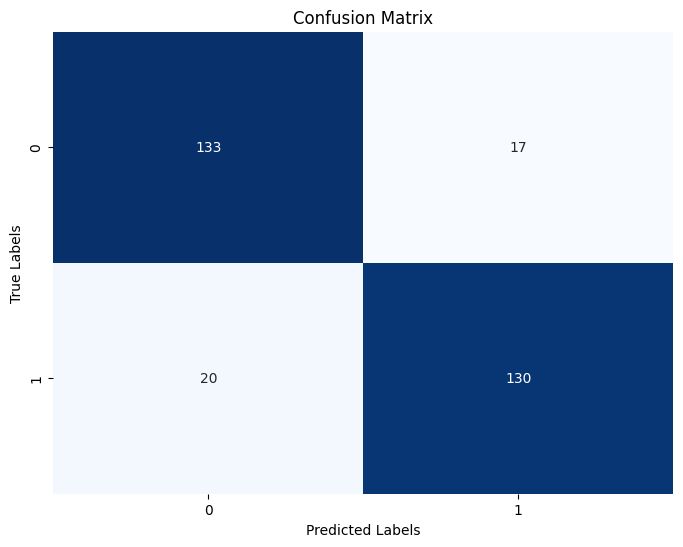

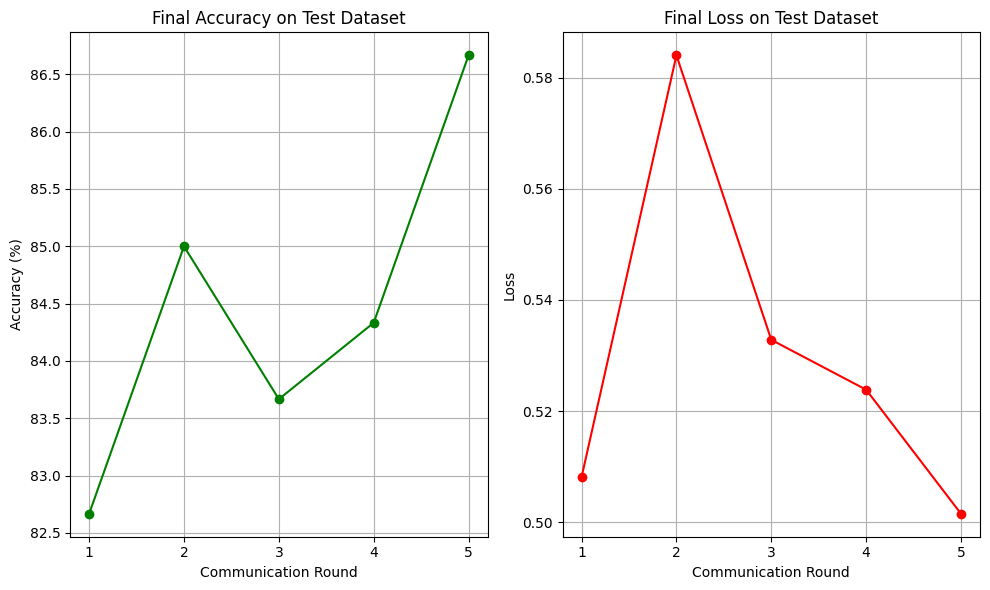

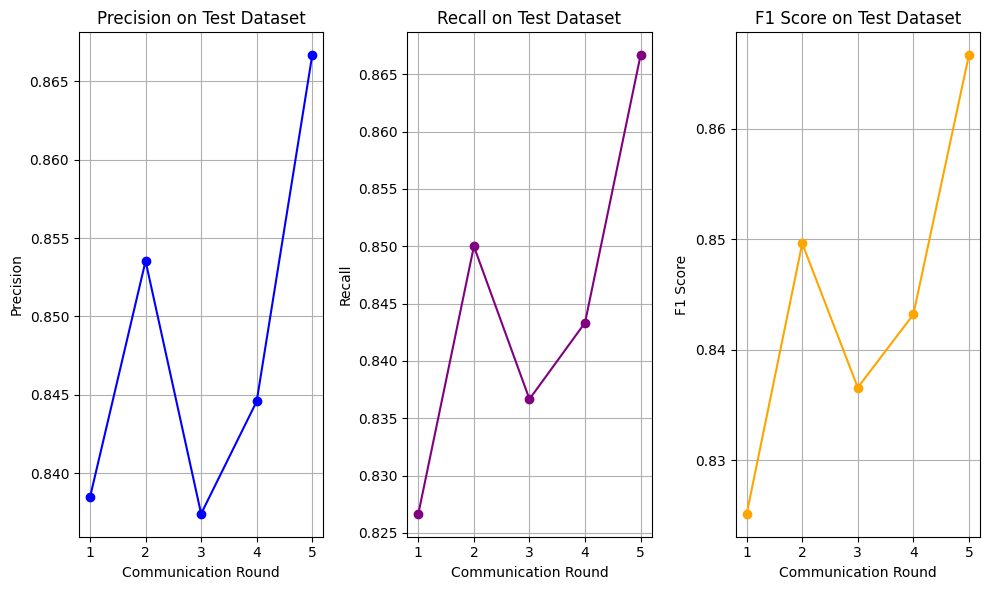

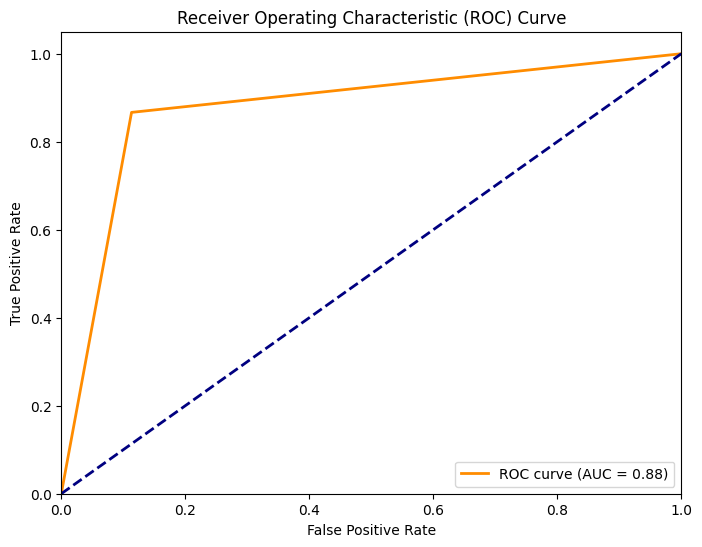

In [10]:
import csv
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Define the number of communication rounds and clients
num_communication_rounds = 5
num_clients = 10
num_epochs_per_round = 100
num_classes = 2 

# Lists to store testing accuracy, final accuracy, final loss, precision, recall, and F1 score
testing_accuracies = []
final_accuracies = []
final_losses = []
precisions = []
recalls = []
f1_scores = []

# Open a CSV file for writing
csv_filename = 'output.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    # Create a CSV writer
    csv_writer = csv.writer(csvfile)

    # Write the header row
    csv_writer.writerow(['Round', 'Client', 'Epoch', 'Training Accuracy', 'Training Loss'])

    # Convert the train_dataset into a list of data points
    train_data_list = list(train_dataset)

    for round in range(num_communication_rounds):
        print(f"Communication Round {round + 1}")

        # Randomly assign data to clients for this round
        client_data = {}
        for i in range(num_clients):
            client_data[i] = random.sample(train_data_list, len(train_data_list) // num_clients)

        # Generate a random AES key using Fernet for this round
        key = Fernet.generate_key()
        cipher_suite = Fernet(key)

        client_models = []

        for client in range(num_clients):
            # Encrypt and send the global model to the client
            global_model_state = global_model.state_dict()
            global_model_encrypted = cipher_suite.encrypt(pickle.dumps(global_model_state))
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'wb') as f:
                f.write(global_model_encrypted)

            # Client-side code (decrypt, train, and fine-tune)
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'rb') as f:
                encrypted_data = f.read()
                decrypted_global_model_state = pickle.loads(cipher_suite.decrypt(encrypted_data))

            decrypted_global_model = resnet101(pretrained=False)
            decrypted_global_model.fc = torch.nn.Linear(decrypted_global_model.fc.in_features, num_classes)
            decrypted_global_model.load_state_dict(decrypted_global_model_state)
            decrypted_global_model = decrypted_global_model.to(device)
            optimizer = optim.SGD(decrypted_global_model.parameters(), lr=0.01)

            print(f"Training Client {client}...")

            for epoch in tqdm(range(num_epochs_per_round), desc=f'Client {client}'):
                client_loader = DataLoader(client_data[client], batch_size=32, shuffle=True)
                total_train_loss = 0.0
                correct_train = 0
                total_train = 0

                for data, target in client_loader:
                    data, target = data.to(device), target.to(device)
                    optimizer.zero_grad()
                    outputs = decrypted_global_model(data)
                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    loss.backward()
                    optimizer.step()

                    total_train_loss += loss.item()
                    _, predicted_train = outputs.max(1)
                    correct_train += predicted_train.eq(target).sum().item()
                    total_train += target.size(0)

                epoch_train_accuracy = 100 * correct_train / total_train
                epoch_train_loss = total_train_loss / len(client_loader)
                print(f'Training Accuracy for Client {client} - Epoch {epoch + 1}: {epoch_train_accuracy:.2f}%')
                print(f'Training Loss for Client {client} - Epoch {epoch + 1}: {epoch_train_loss:.4f}')

                # Write to CSV
                csv_writer.writerow([round + 1, client + 1, epoch + 1, epoch_train_accuracy, epoch_train_loss])


        # Evaluate the client model on the test dataset
            decrypted_global_model.eval()
            correct_test = 0
            total_test = 0
            test_loss = 0.0

            all_predictions = []
            all_targets = []

            with torch.no_grad():
                for data, target in test_dataset:
                    data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
                    outputs = decrypted_global_model(data.unsqueeze(0))
                    predictions = outputs.argmax()
                    correct_test += (predictions == target).item()

                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    test_loss += loss.item()

                    all_predictions.append(predictions.item())
                    all_targets.append(target.item())

                    total_test += 1

            test_accuracy = 100 * correct_test / total_test
            avg_test_loss = test_loss / total_test

            # Calculate precision, recall, and F1 score for this round
            precision = precision_score(all_targets, all_predictions, average='weighted')
            recall = recall_score(all_targets, all_predictions, average='weighted')
            f1 = f1_score(all_targets, all_predictions, average='weighted')

            # Store metrics for each client
            client_testing_accuracies = [test_accuracy]
            client_testing_losses = [avg_test_loss]
            client_precisions = [precision]
            client_recalls = [recall]
            client_f1_scores = [f1]


            print(f'Testing Accuracy for Client {client}: {test_accuracy:.2f}%')
            print(f'Testing Loss for Client {client}: {avg_test_loss:.4f}')
            print(f'Precision for Client {client}: {precision:.4f}')
            print(f'Recall for Client {client}: {recall:.4f}')
            print(f'F1 Score for Client {client}: {f1:.4f}')

            decrypted_global_model.train()
            client_models.append(decrypted_global_model)

        # ... (Existing code)

        # Aggregate client models (simple model averaging)
        aggregated_model_state = {}
        for param_name in global_model.state_dict():
            aggregated_param = torch.stack([client.state_dict()[param_name].float() for client in client_models]).mean(dim=0)
            aggregated_model_state[param_name] = aggregated_param

        # Update the global model with the aggregated model
        global_model.load_state_dict(aggregated_model_state)

        # Store testing accuracy for this round
        testing_accuracies.append(client_testing_accuracies)

        # Append client-specific metrics to the overall lists
        final_accuracies.append(client_testing_accuracies[-1])  # Assuming you want the accuracy of the last client
        final_losses.append(client_testing_losses[-1])  # Assuming you want the loss of the last client
        precisions.append(client_precisions[-1])  # Assuming you want the precision of the last client
        recalls.append(client_recalls[-1])  # Assuming you want the recall of the last client
        f1_scores.append(client_f1_scores[-1])  # Assuming you want the F1 score of the last client

        # Save the final global model
        torch.save(global_model.state_dict(), f'final_global_model_round_{round}.pth')


# Save other relevant information
saved_data = {
    'num_communication_rounds': num_communication_rounds,
    'num_clients': num_clients,
    'num_epochs_per_round': num_epochs_per_round,
    'num_classes': num_classes,
    'testing_accuracies': testing_accuracies,
    'final_accuracies': final_accuracies,
    'final_losses': final_losses,
    'precisions': precisions,
    'recalls': recalls,
    'f1_scores': f1_scores,
}

with open('saved_data.pkl', 'wb') as f:
    pickle.dump(saved_data, f)

# Evaluate the final global model on the test dataset
global_model.eval()
correct = 0
total = 0
final_loss = 0.0
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, target in test_dataset:
        data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
        outputs = global_model(data.unsqueeze(0))
        predictions = outputs.argmax()
        correct += (predictions == target).item()

        loss = torch.nn.functional.cross_entropy(outputs, target)
        final_loss += loss.item()

        all_predictions.append(predictions.item())
        all_targets.append(target.item())

        total += 1

final_accuracy = 100 * correct / total
avg_final_loss = final_loss / total
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_targets, all_predictions)
roc_fpr, roc_tpr, _ = roc_curve(all_targets, all_predictions)
roc_auc = auc(roc_fpr, roc_tpr)

print(f'Final Accuracy on Test Dataset: {final_accuracy:.2f}%')
print(f'Final Loss on Test Dataset: {avg_final_loss:.4f}')
print(f'Precision on Test Dataset: {precision:.4f}')
print(f'Recall on Test Dataset: {recall:.4f}')
print(f'F1 Score on Test Dataset: {f1:.4f}')



# Save the final global model and other evaluation results
torch.save(global_model.state_dict(), 'final_global_model.pth')

# Save other relevant evaluation results
evaluation_results = {
    'final_accuracy': final_accuracy,
    'avg_final_loss': avg_final_loss,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'conf_matrix': conf_matrix,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_auc': roc_auc,
}

with open('evaluation_results.pkl', 'wb') as f:
    pickle.dump(evaluation_results, f)


# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the final accuracy and loss on the test dataset
plt.figure(figsize=(10, 6))

# Plotting final accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_communication_rounds + 1), final_accuracies, marker='o', color='green')
plt.title('Final Accuracy on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting final loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_communication_rounds + 1), final_losses, marker='o', color='red')
plt.title('Final Loss on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(roc_fpr, roc_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()